In [31]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 40,20

In [26]:
dataset = pd.read_csv("Data Emas Gabungan (2014-2018) fixbangetuhuy.csv")
IndexedDataset = dataset.set_index(['Tanggal'])

In [70]:
from datetime import datetime
IndexedDataset

,Terakhir
Tanggal,
2014-01-01,1205.40
2014-01-02,1391.70
2014-01-03,1405.50
2014-01-06,1405.00
2014-01-07,1395.50
2014-01-08,1392.60
2014-01-09,1397.90
2014-01-10,1413.40
2014-01-13,1416.00


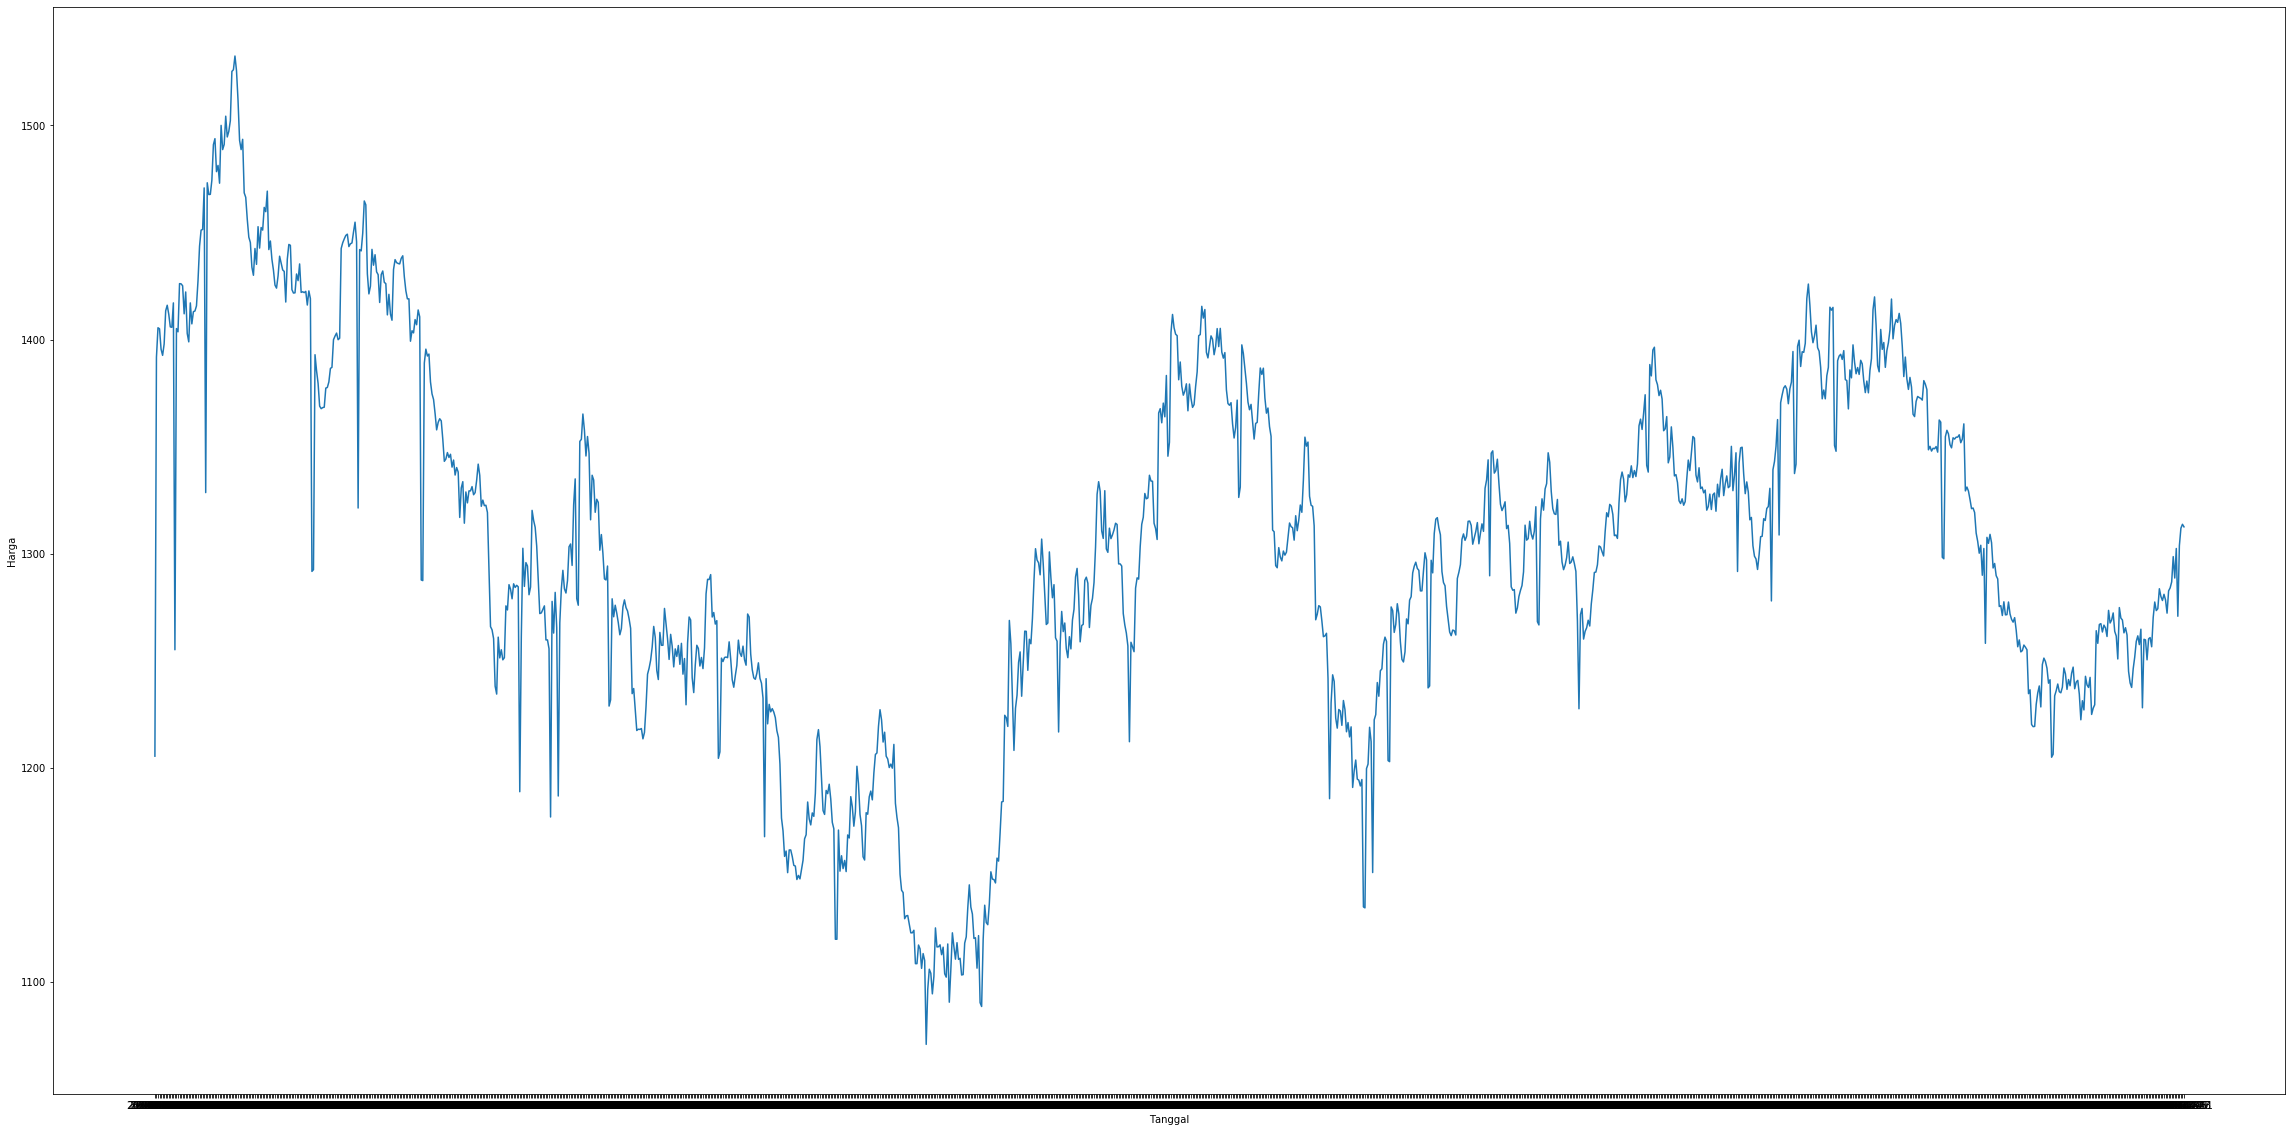

In [32]:
plt.xlabel("Tanggal")
plt.ylabel("Harga")
plt.plot(IndexedDataset)

In [39]:
rolmean = IndexedDataset.rolling(window=24).mean()

rolstd = IndexedDataset.rolling(window=24).std()
print(rolmean, rolstd)

               Terakhir
Tanggal                
2014-01-01          NaN
2014-01-02          NaN
2014-01-03          NaN
2014-01-06          NaN
2014-01-07          NaN
2014-01-08          NaN
2014-01-09          NaN
2014-01-10          NaN
2014-01-13          NaN
2014-01-14          NaN
2014-01-15          NaN
2014-01-16          NaN
2014-01-17          NaN
2014-01-20          NaN
2014-01-21          NaN
2014-01-22          NaN
2014-01-23          NaN
2014-01-24          NaN
2014-01-27          NaN
2014-01-28          NaN
2014-01-29          NaN
2014-01-30          NaN
2014-01-31          NaN
2014-02-03  1394.062500
2014-02-04  1402.475000
2014-02-05  1403.362500
2014-02-06  1403.687500
2014-02-07  1404.133333
2014-02-10  1405.466667
2014-02-11  1407.591667
...                 ...
2018-11-20  1260.575000
2018-11-21  1260.495833
2018-11-22  1258.941667
2018-11-23  1258.887500
2018-11-26  1258.312500
2018-11-27  1257.595833
2018-11-28  1257.229167
2018-11-29  1256.750000
2018-11-30  1256

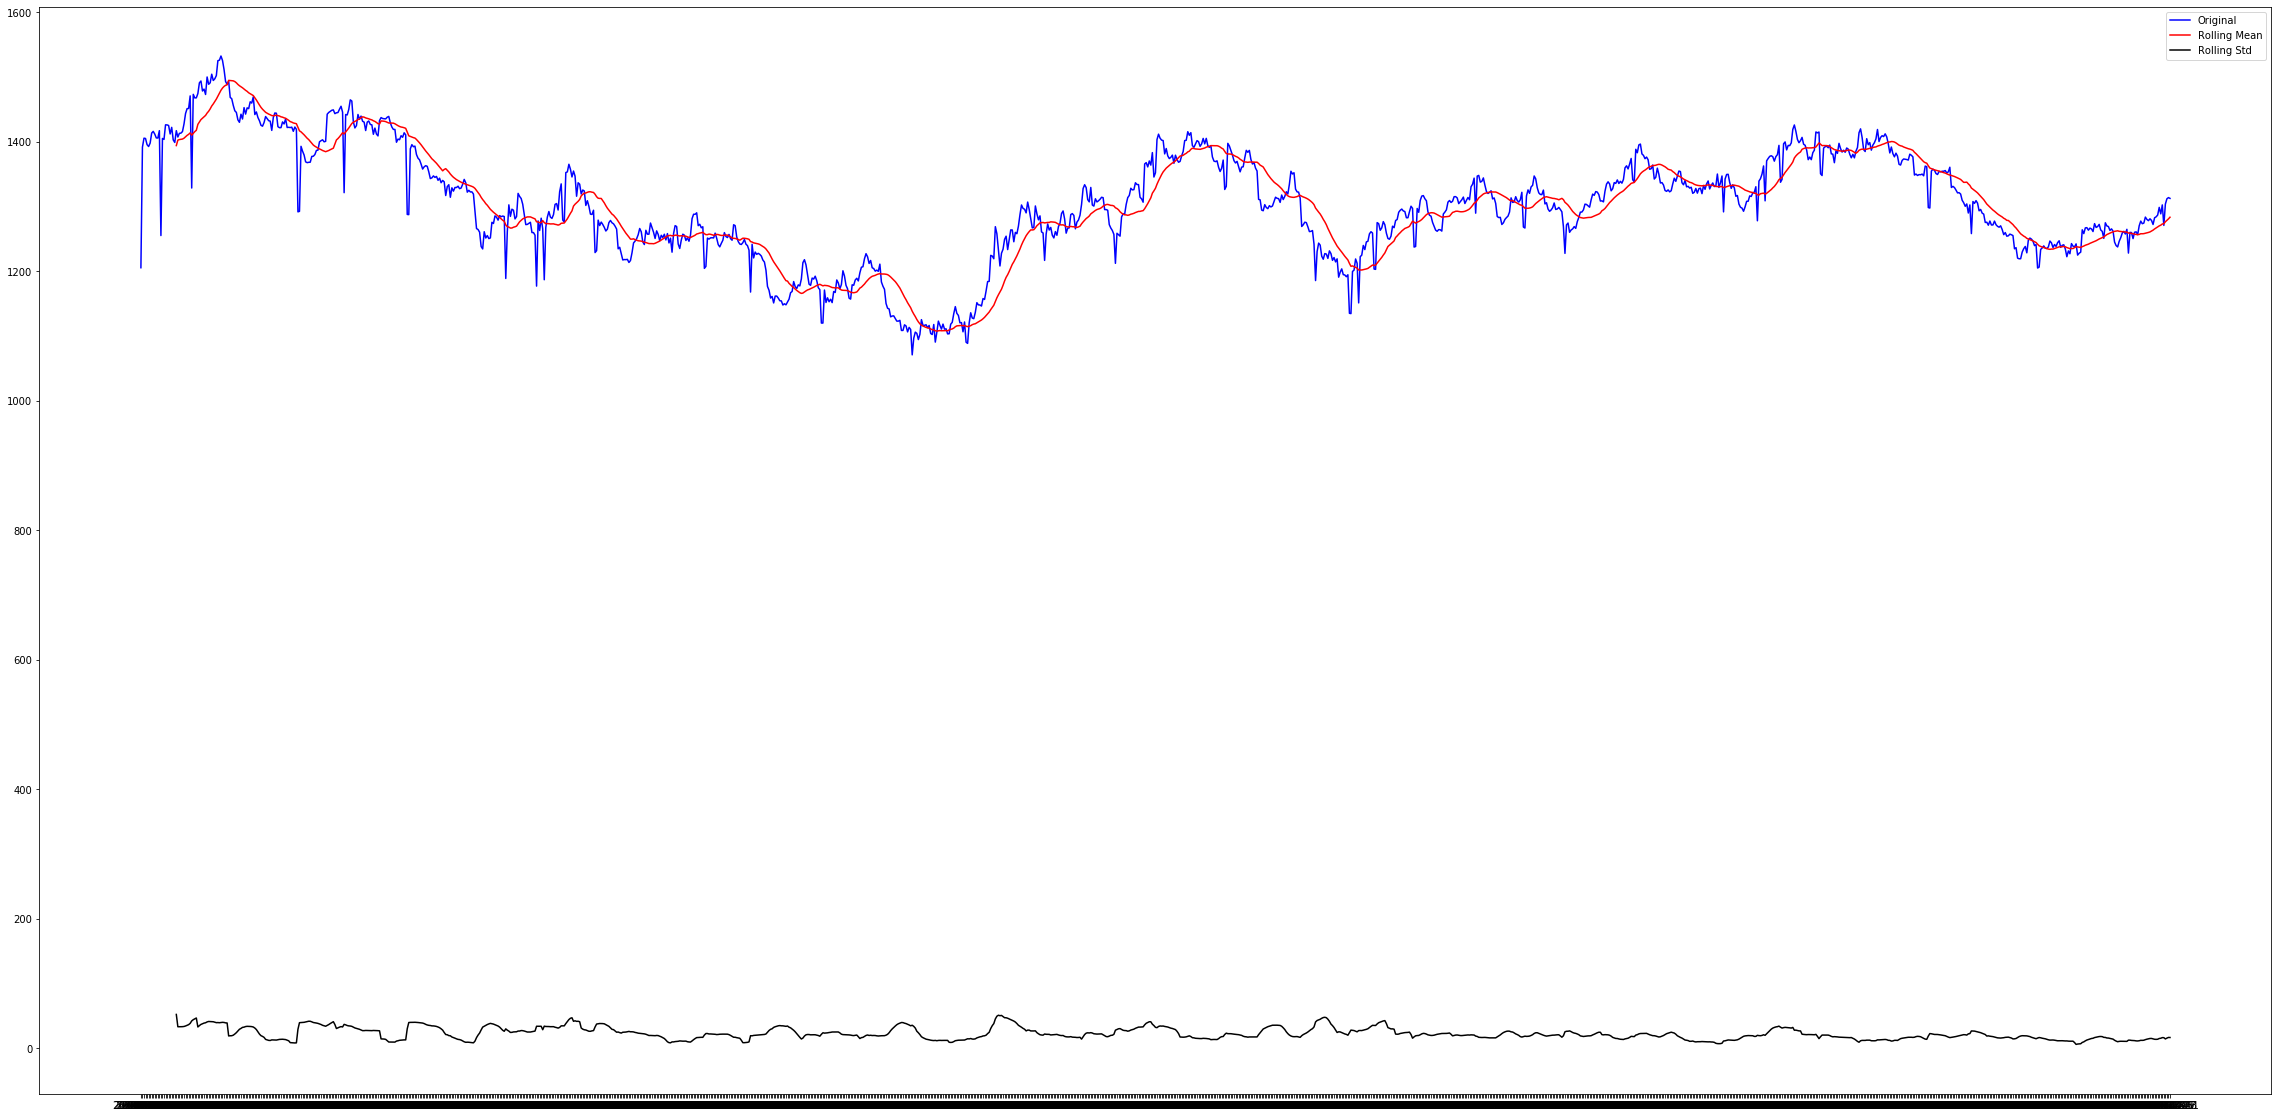

In [40]:
orig = plt.plot(IndexedDataset,color='blue',label='Original')
mean = plt.plot(rolmean,color='red',label='Rolling Mean')
std = plt.plot(rolstd,color='black',label='Rolling Std')
plt.legend(loc='best')
plt.show(block='false')


In [44]:
from statsmodels.tsa.stattools import adfuller

print('Dickey-Fuller Test Result:')
dftest = adfuller(IndexedDataset['Terakhir'],autolag='AIC')

dfoutput = pd.Series(dftest[0:4],index=['Test Statistic','p=value','#lags used','number of observations'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key]=value
    
print(dfoutput)

Dickey-Fuller Test Result:
Test Statistic              -2.322132
p=value                      0.164929
#lags used                   4.000000
number of observations    1314.000000
Critical Value (1%)         -3.435336
Critical Value (5%)         -2.863742
Critical Value (10%)        -2.567942
dtype: float64


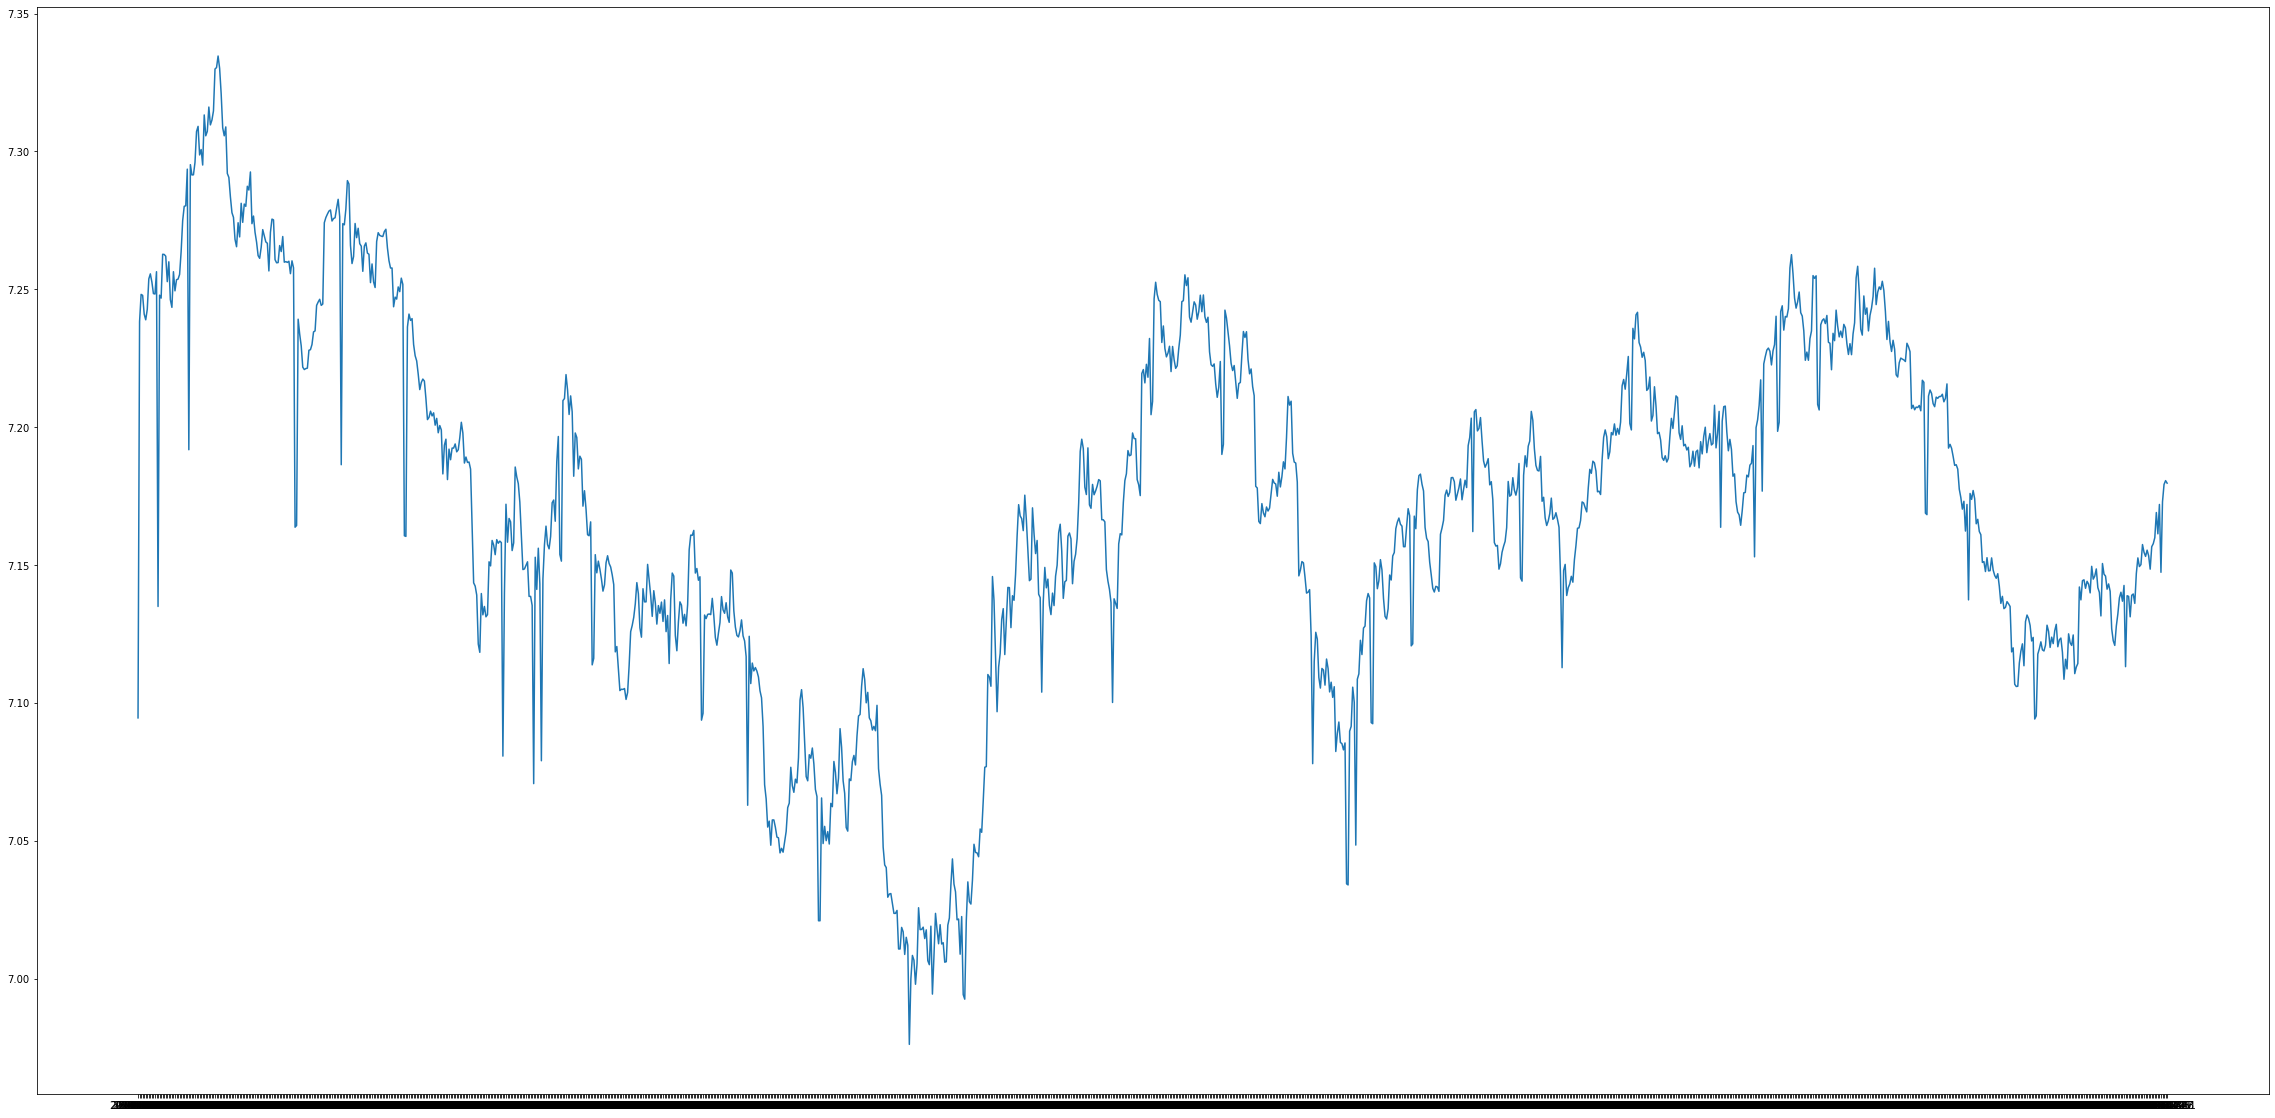

In [45]:
IndexedDataset_logScale = np.log(IndexedDataset)
plt.plot(IndexedDataset_logScale)

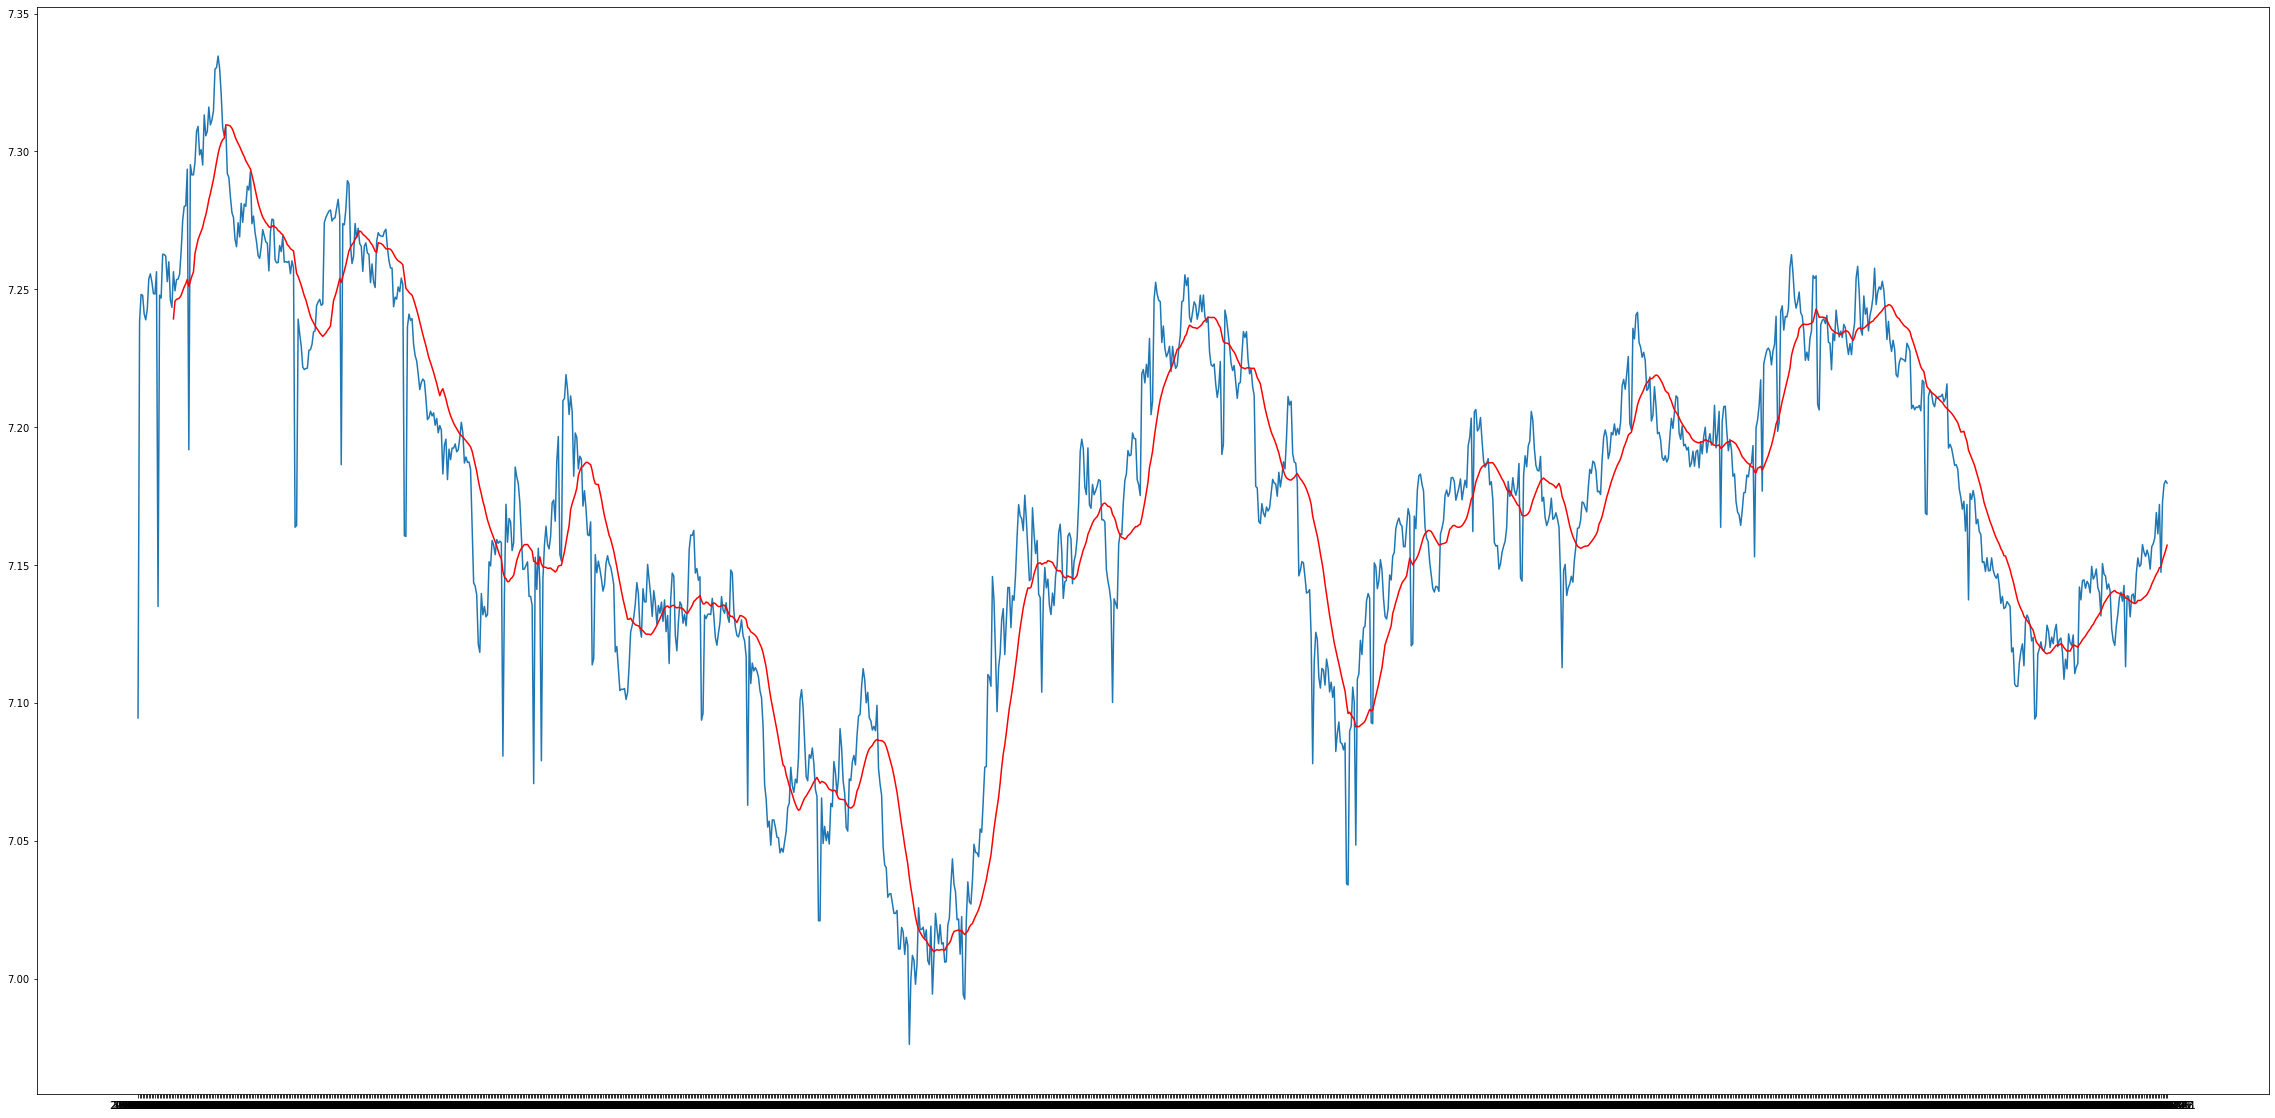

In [47]:
movingAverage = IndexedDataset_logScale.rolling(window=24).mean()
movingSTD = IndexedDataset_logScale.rolling(window=24).std()
plt.plot(IndexedDataset_logScale)
plt.plot(movingAverage, color='red')

In [48]:
datasetLogScaleMinusMovingAverage = IndexedDataset_logScale - movingAverage
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)

,Terakhir
Tanggal,
2014-02-03,0.017109
2014-02-04,0.003717
2014-02-05,0.007126
2014-02-06,0.007107
2014-02-07,0.008488
2014-02-10,0.015844
2014-02-11,0.025561
2014-02-12,0.029186
2014-02-13,0.028288


In [54]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    movingAverage = timeseries.rolling(window=24).mean()
    movingSTD = timeseries.rolling(window=24).std()
    
    orig = plt.plot(timeseries,color='blue',label='Original')
    mean = plt.plot(movingAverage,color='red',label='Rolling Mean')
    std = plt.plot(movingSTD,color='black',label='Rolling Std')
    plt.legend(loc='best')
    plt.show(block='false')
    
    print('Dickey-Fuller Test Result:')
    dftest = adfuller(timeseries['Terakhir'],autolag='AIC')

    dfoutput = pd.Series(dftest[0:4],index=['Test Statistic','p=value','#lags used','number of observations'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key]=value
    
    print(dfoutput)

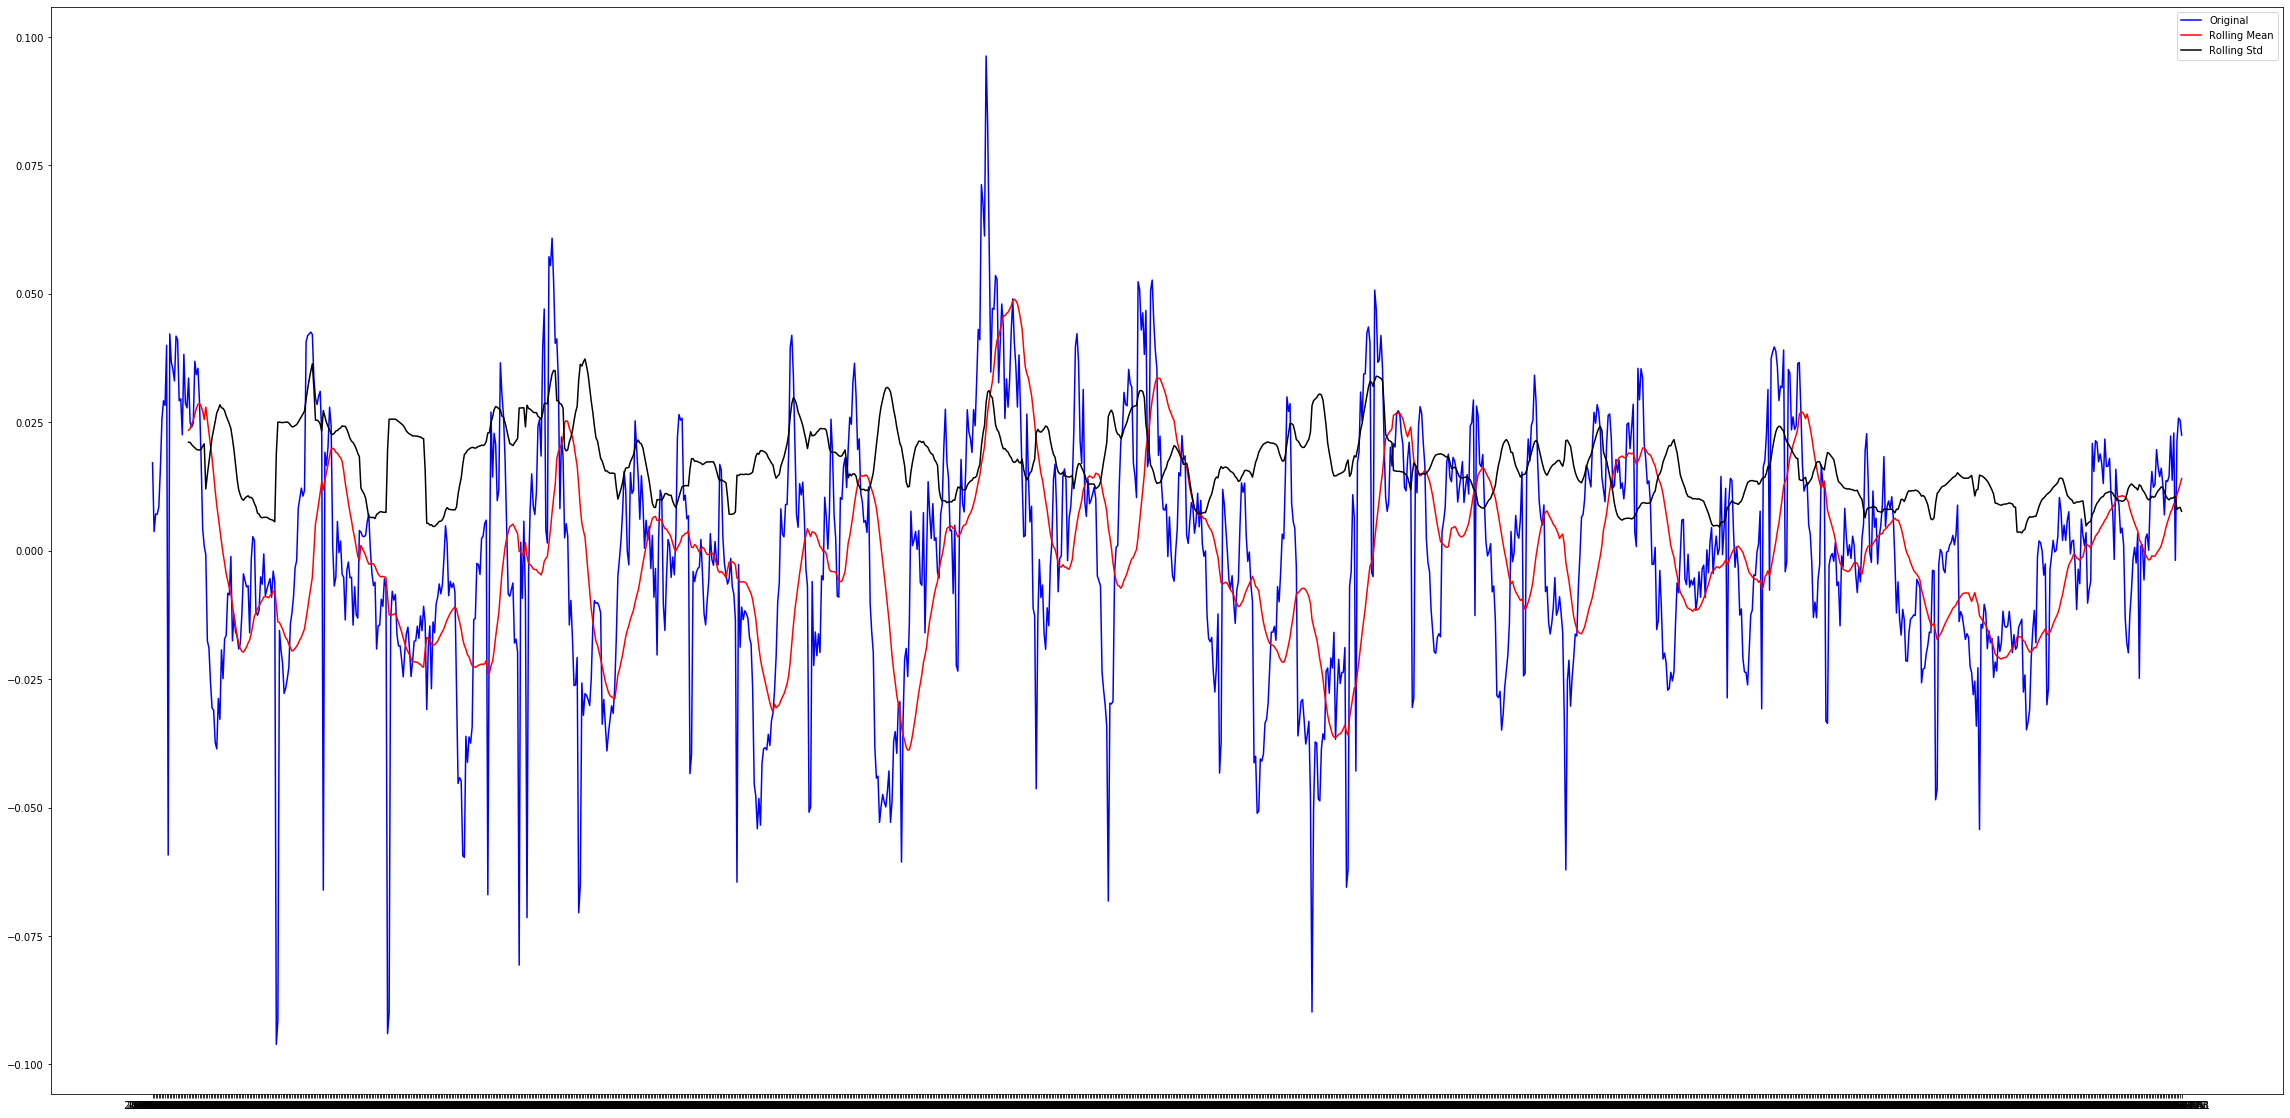

Dickey-Fuller Test Result:
Test Statistic           -7.396933e+00
p=value                   7.734000e-11
#lags used                8.000000e+00
number of observations    1.287000e+03
Critical Value (1%)      -3.435441e+00
Critical Value (5%)      -2.863788e+00
Critical Value (10%)     -2.567967e+00
dtype: float64


In [55]:
test_stationarity(datasetLogScaleMinusMovingAverage)

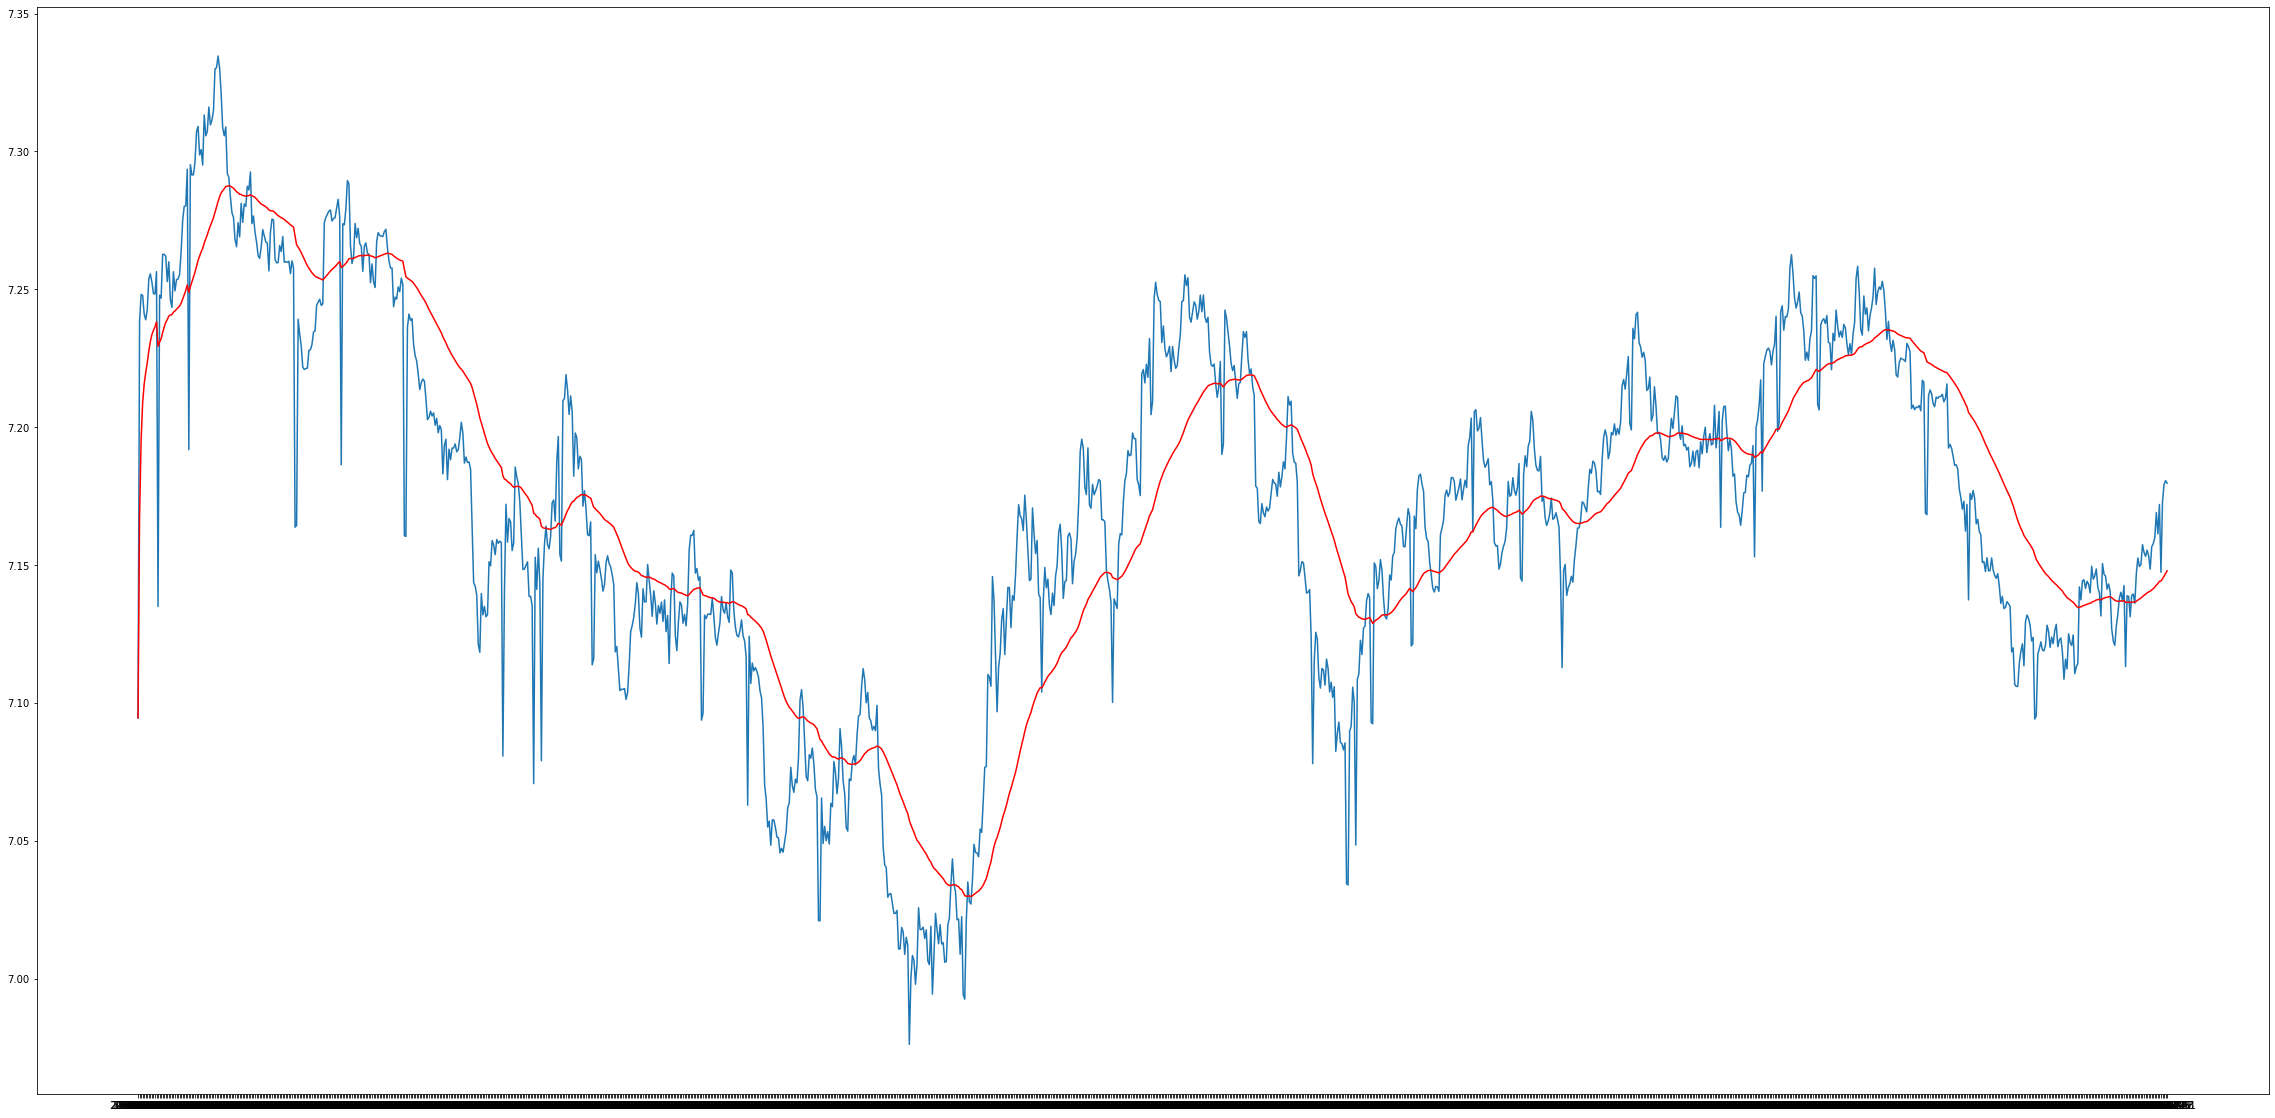

In [57]:
exponentialDecayWeightedAverage = IndexedDataset_logScale.ewm(halflife=24,min_periods=0,adjust=True).mean()
plt.plot(IndexedDataset_logScale)
plt.plot(exponentialDecayWeightedAverage, color='red')

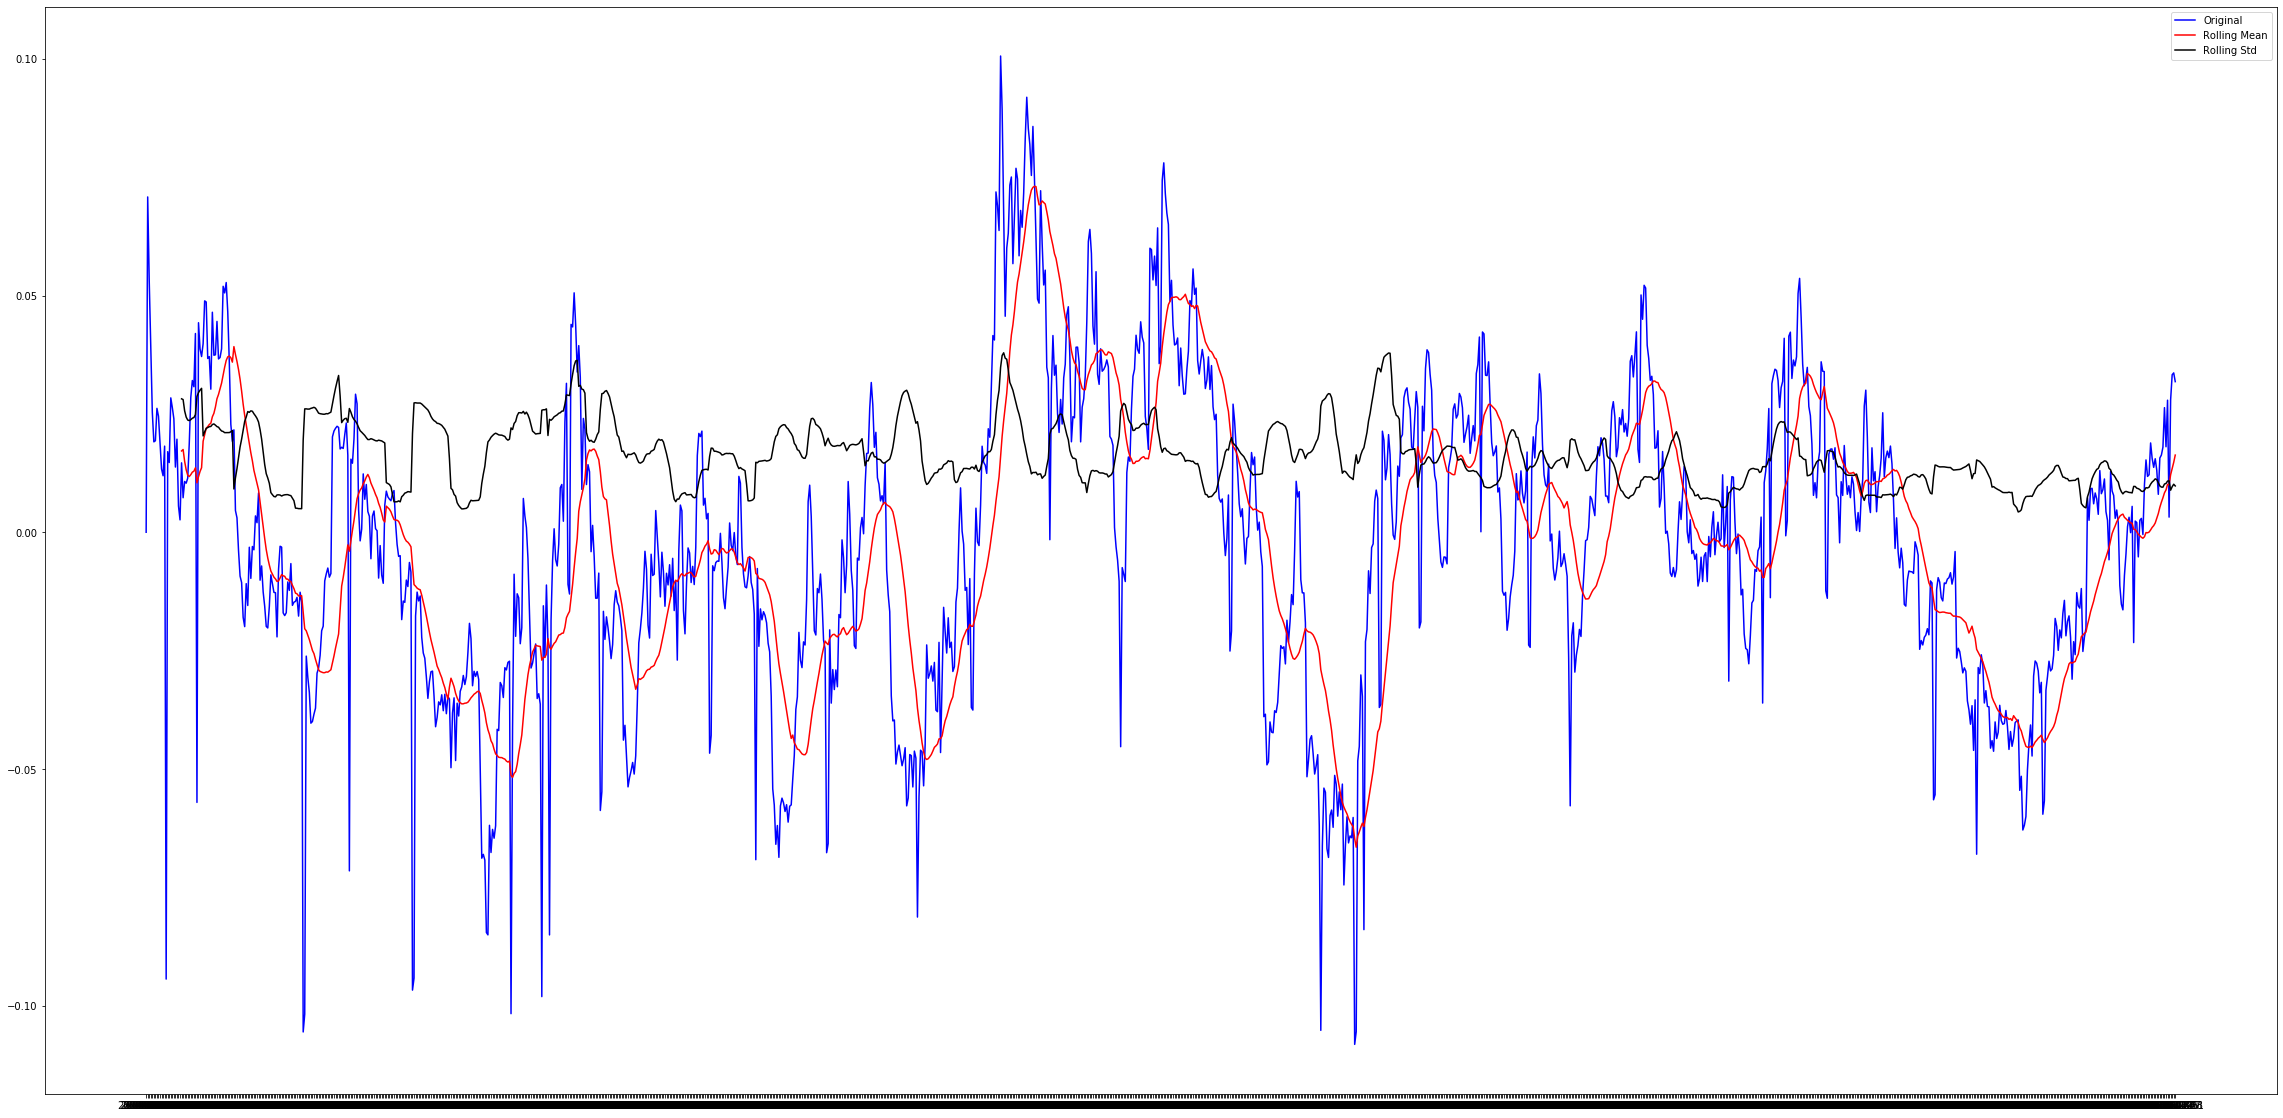

Dickey-Fuller Test Result:
Test Statistic              -4.610486
p=value                      0.000124
#lags used                   4.000000
number of observations    1314.000000
Critical Value (1%)         -3.435336
Critical Value (5%)         -2.863742
Critical Value (10%)        -2.567942
dtype: float64


In [61]:
datasetLogScaleMinusMovingExponentialDecayAverage = IndexedDataset_logScale - exponentialDecayWeightedAverage
test_stationarity(datasetLogScaleMinusMovingExponentialDecayAverage)

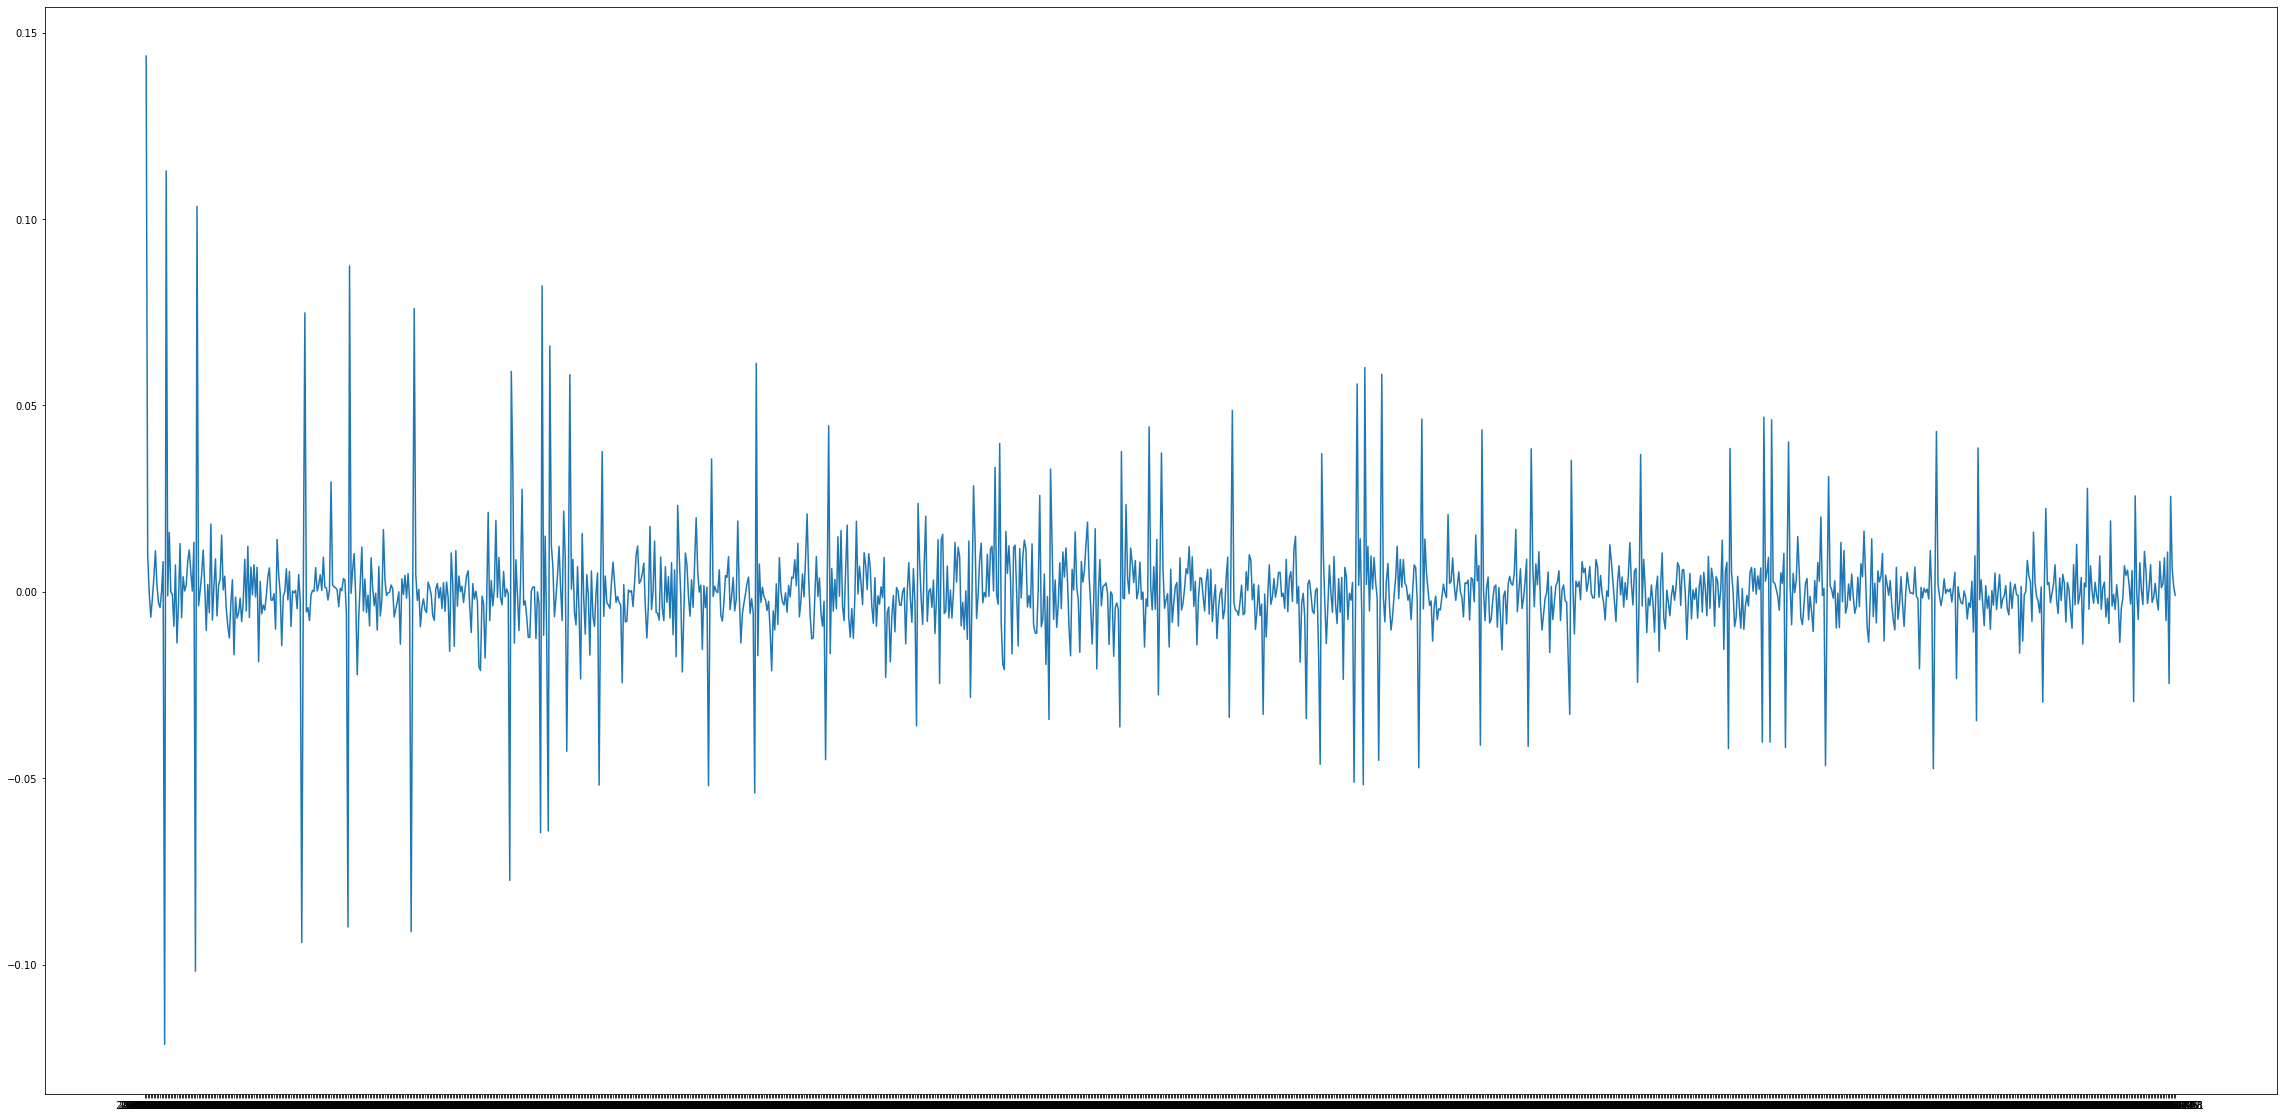

In [62]:
datasetLogDiffShifting = IndexedDataset_logScale - IndexedDataset_logScale.shift()
plt.plot(datasetLogDiffShifting)

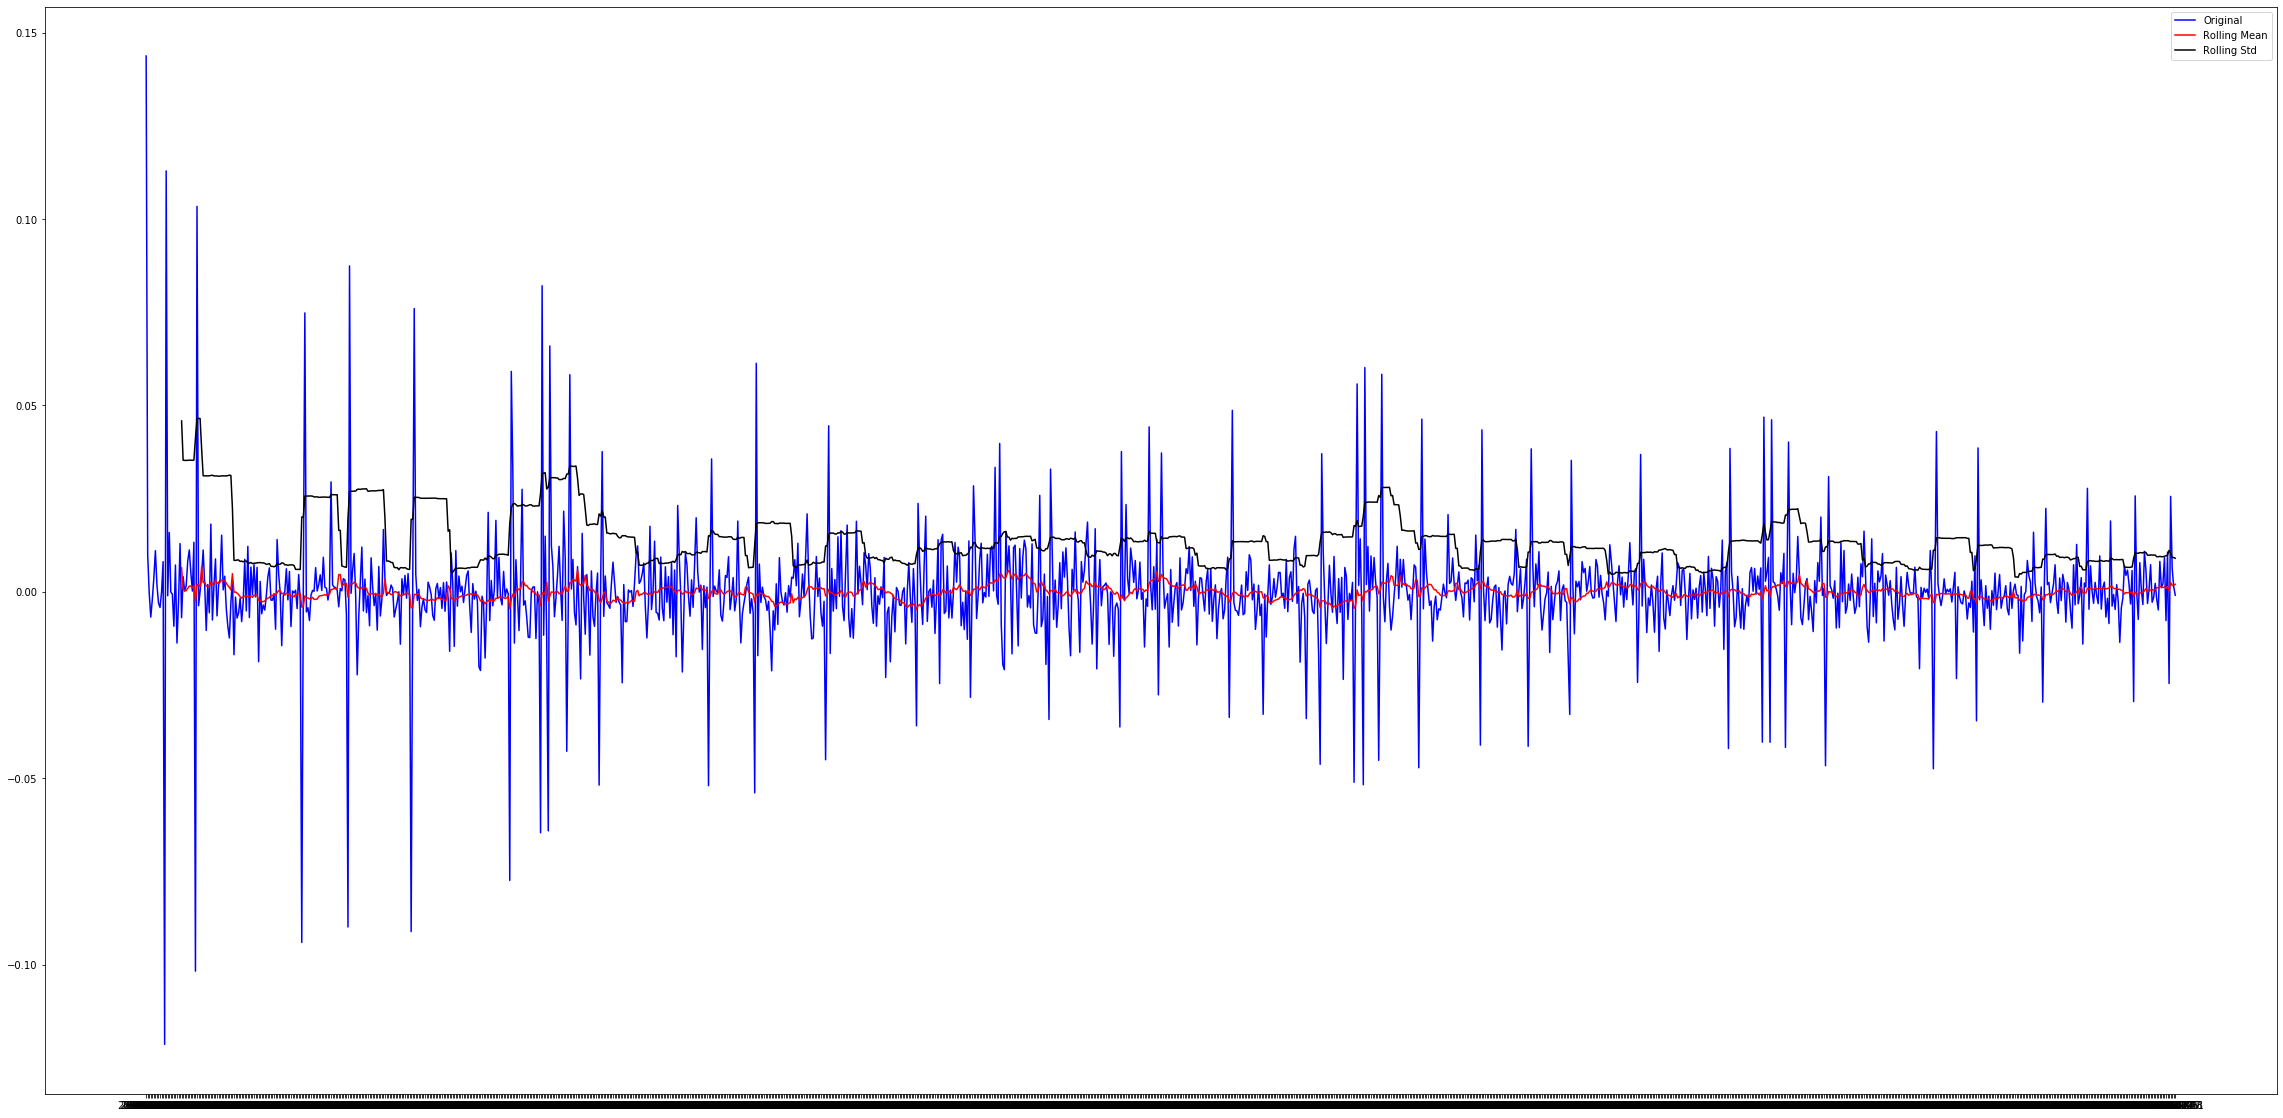

Dickey-Fuller Test Result:
Test Statistic             -24.526135
p=value                      0.000000
#lags used                   3.000000
number of observations    1314.000000
Critical Value (1%)         -3.435336
Critical Value (5%)         -2.863742
Critical Value (10%)        -2.567942
dtype: float64


In [64]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

In [135]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(datasetLogDiffShifting)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual=decomposition.resid

plt.subplot(411)
plt.plot(IndexedDataset_logScale, label = 'Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label = 'Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label = 'Residuals')
plt.legend(loc='best')
plt.tight_layout()

decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

AttributeError: 'Index' object has no attribute 'inferred_freq'

In [72]:
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)

NameError: name 'residual' is not defined

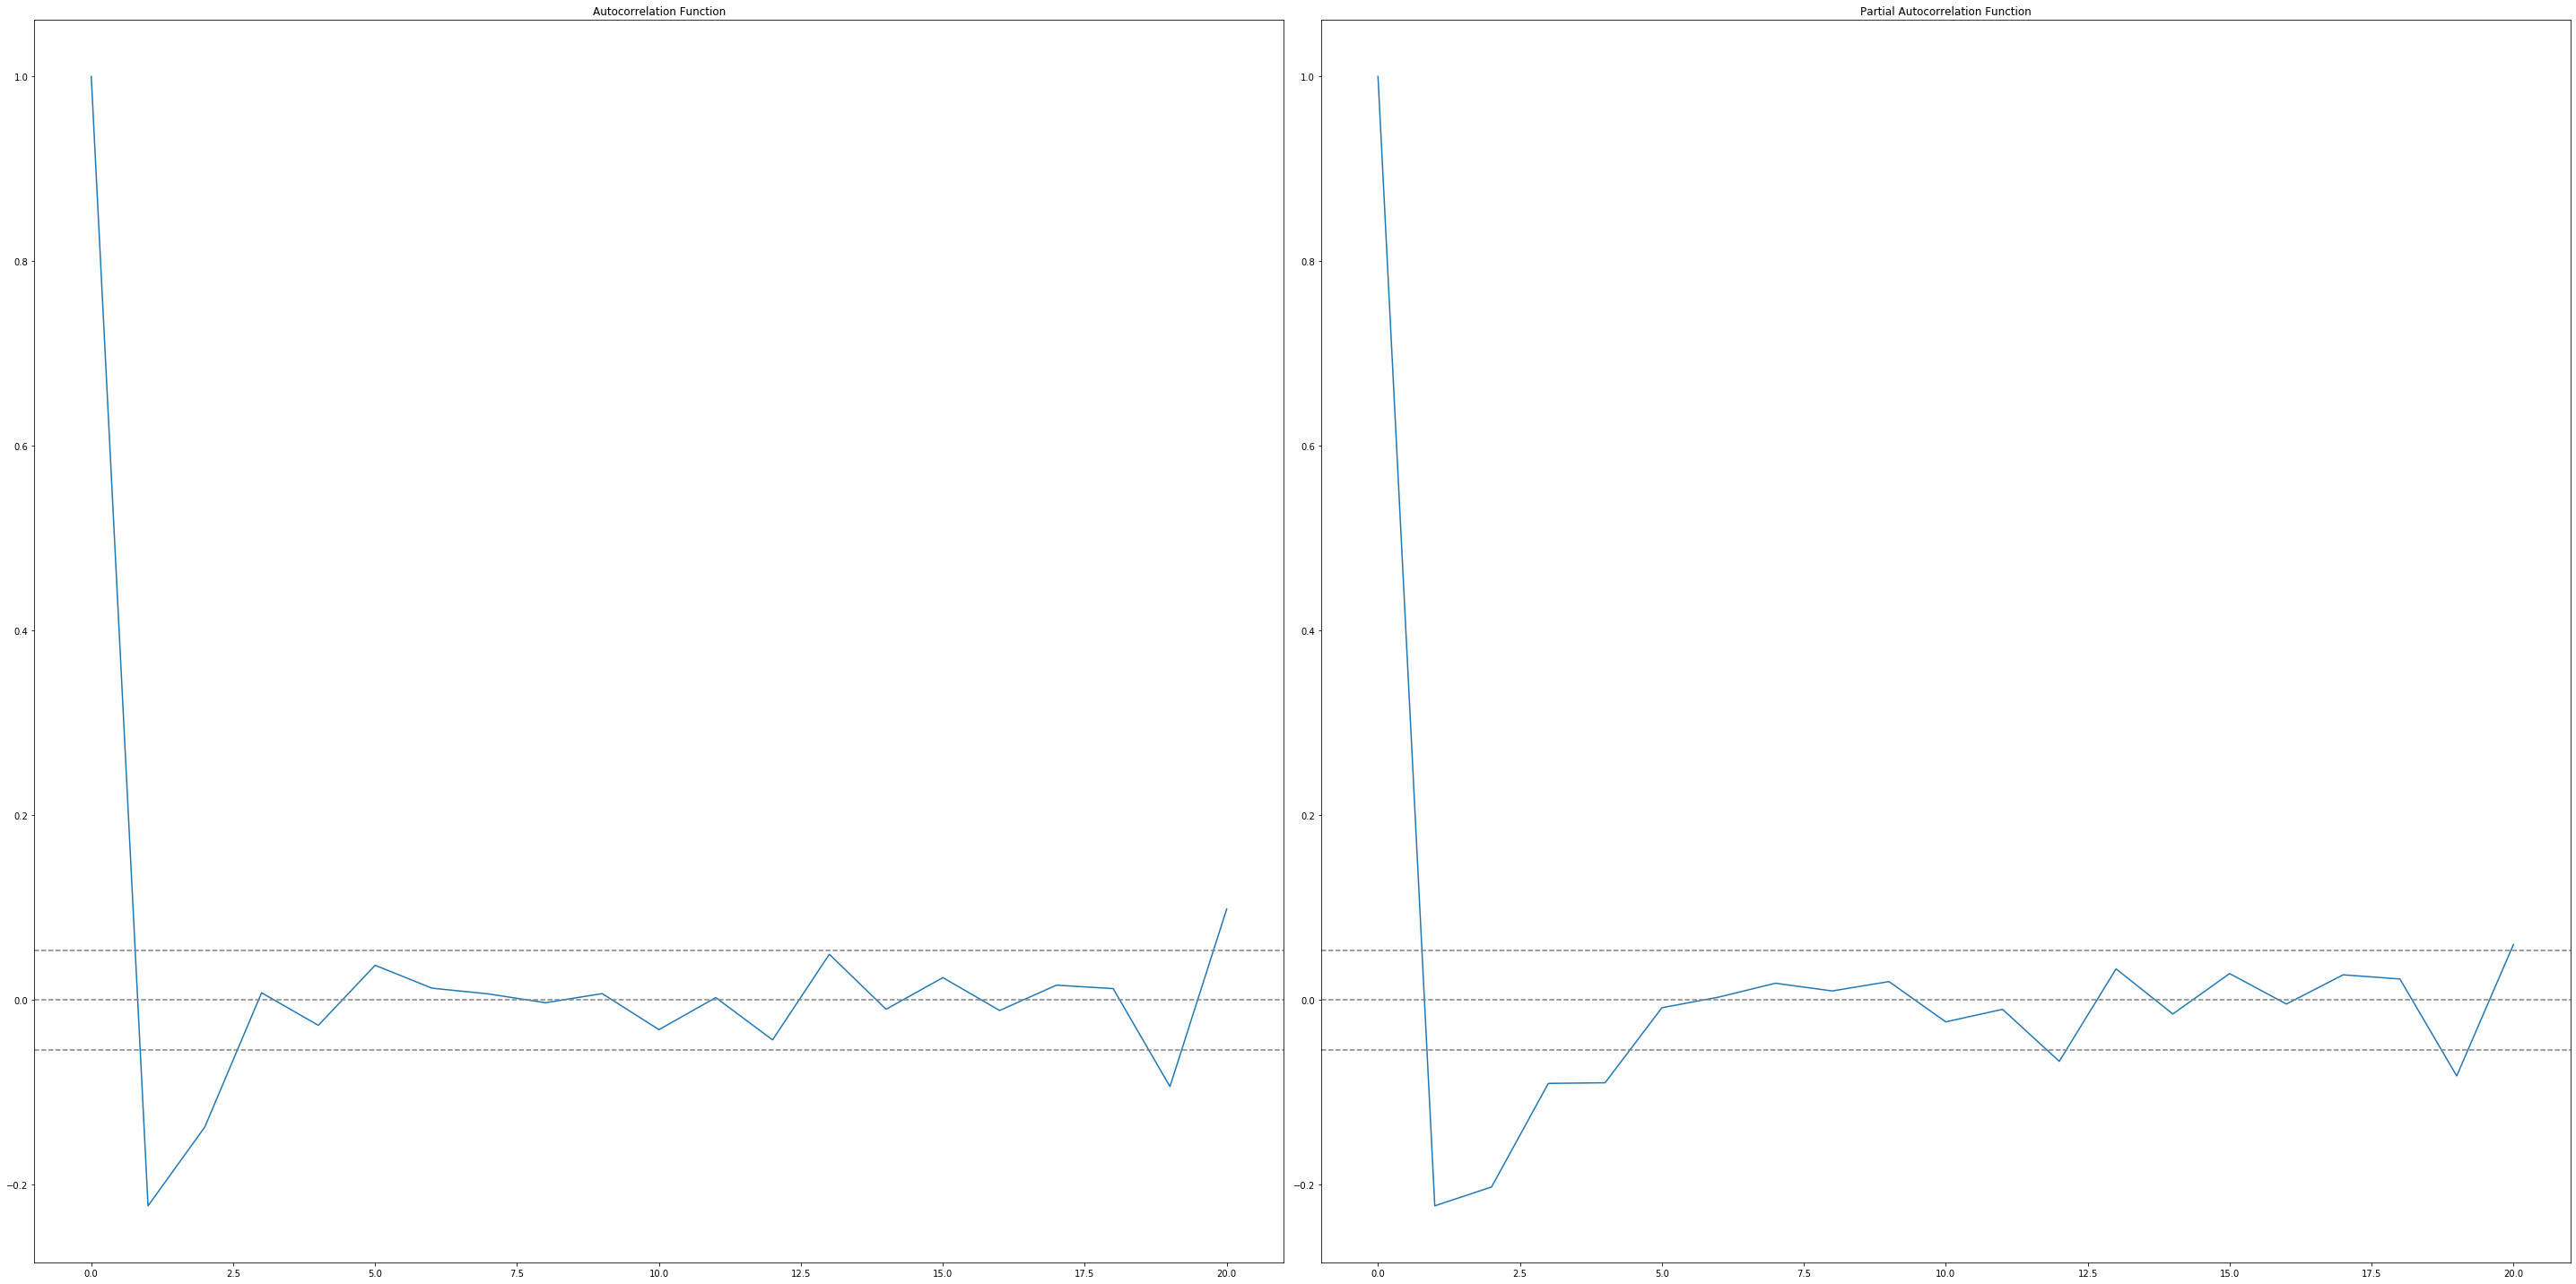

In [136]:
from statsmodels.tsa.stattools import acf,pacf

lag_acf = acf(datasetLogDiffShifting, nlags=20)
lag_pacf = pacf(datasetLogDiffShifting, nlags=20,method='ols')

plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

Plotting AR


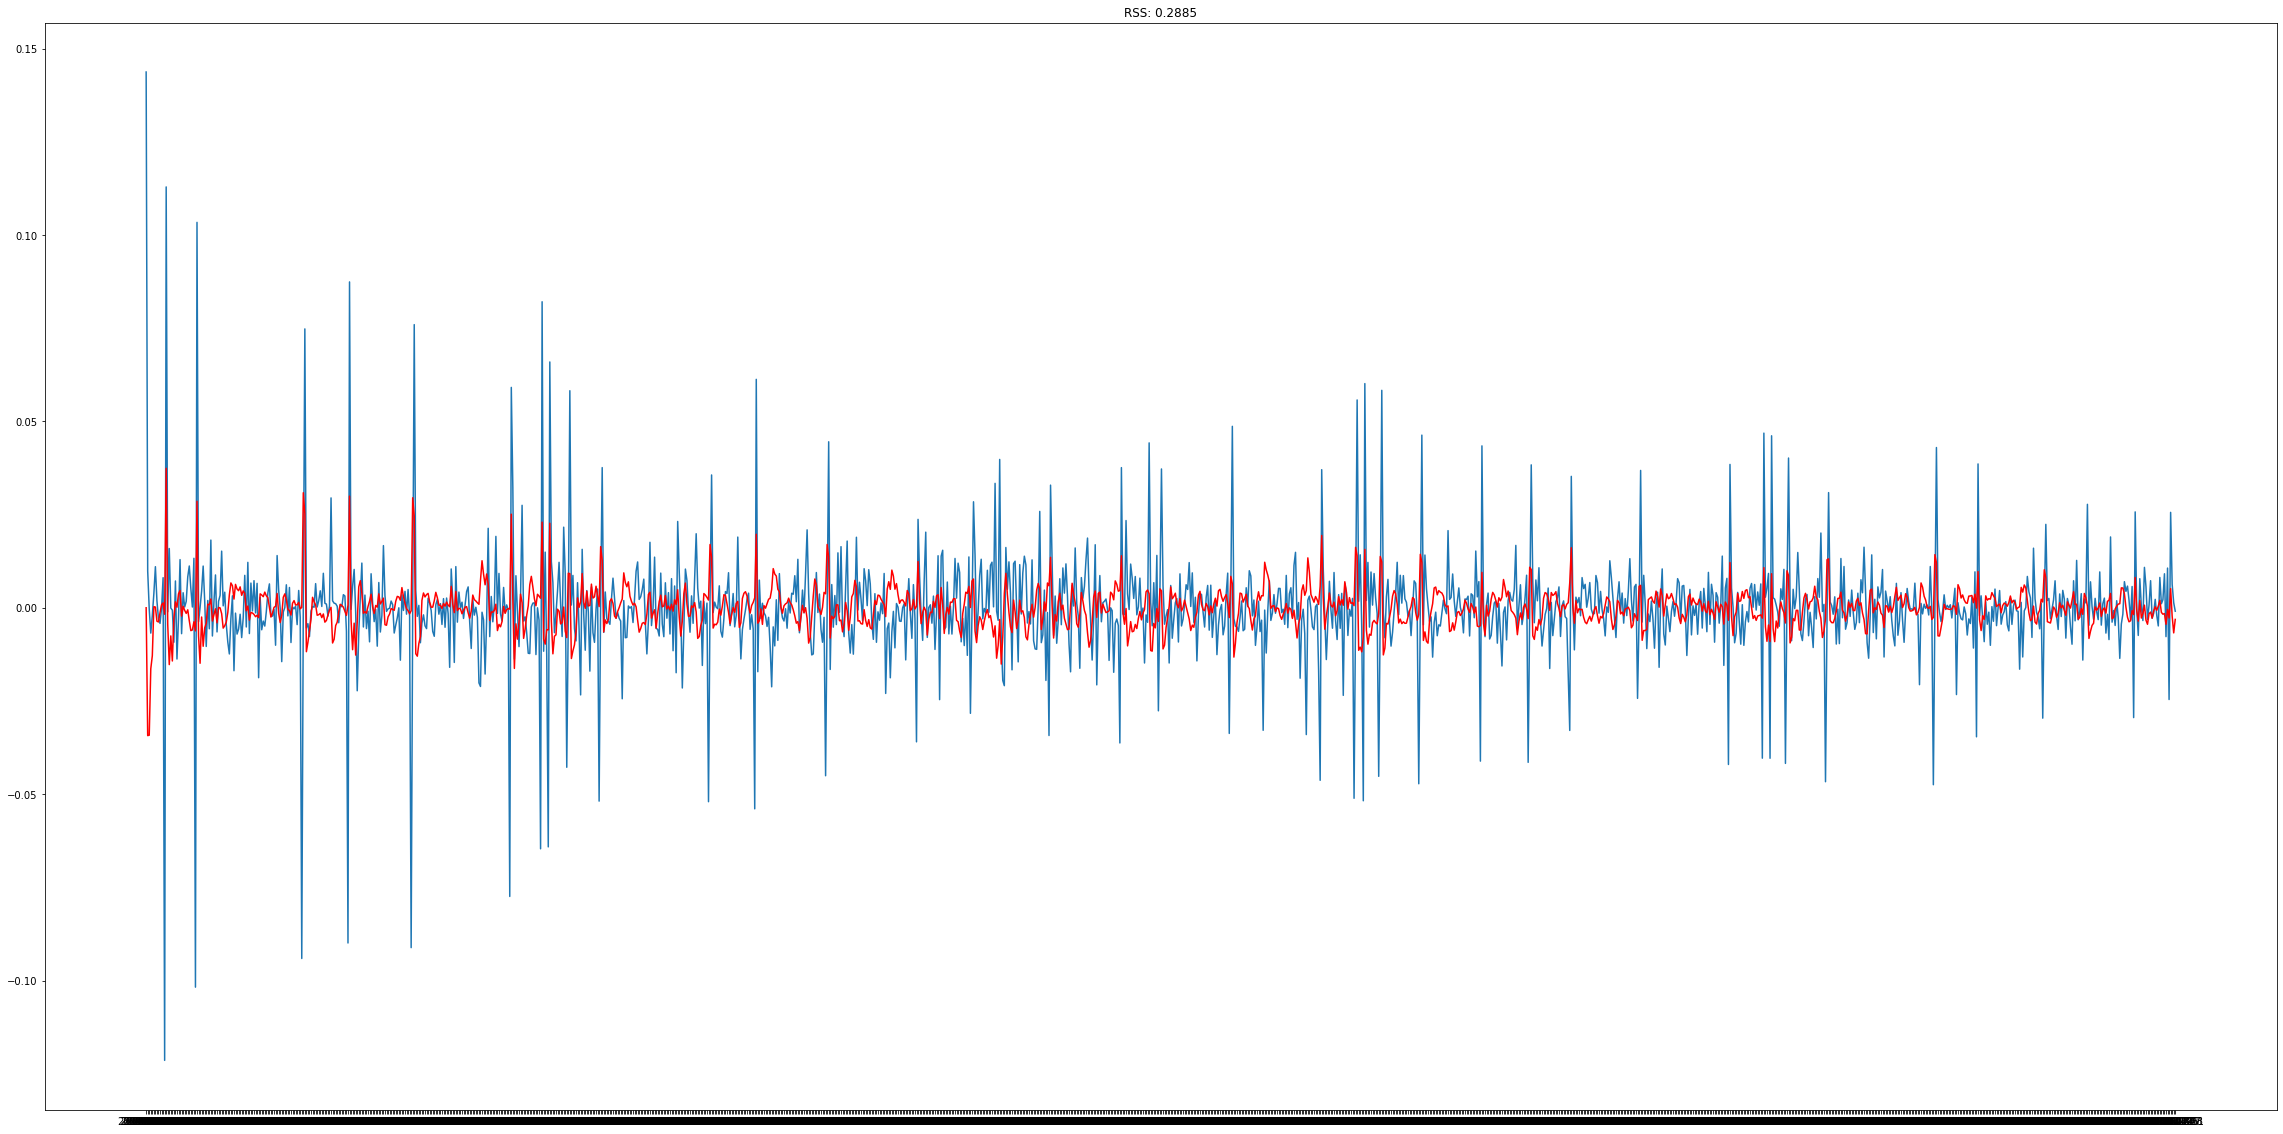

In [148]:
from statsmodels.tsa.arima_model import ARIMA
from warnings import filterwarnings
warnings.filterwarnings('ignore')

model = ARIMA(IndexedDataset_logScale, order=(5,1,0))
results_AR = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues,color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-datasetLogDiffShifting["Terakhir"])**2))
print('Plotting AR')

In [149]:
predictions_ARIMA_diff = pd.Series(results_AR.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Tanggal
2014-01-02    0.000012
2014-01-03   -0.034281
2014-01-06   -0.034177
2014-01-07   -0.016370
2014-01-08   -0.012844
dtype: float64


In [150]:
predictions_ARIMA_diff_cumsum=predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Tanggal
2014-01-02    0.000012
2014-01-03   -0.034269
2014-01-06   -0.068446
2014-01-07   -0.084816
2014-01-08   -0.097660
dtype: float64


In [151]:
predictions_ARIMA_log = pd.Series(IndexedDataset_logScale['Terakhir'].ix[0], index=IndexedDataset_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Tanggal
2014-01-01    7.094567
2014-01-02    7.094578
2014-01-03    7.060298
2014-01-06    7.026121
2014-01-07    7.009751
dtype: float64

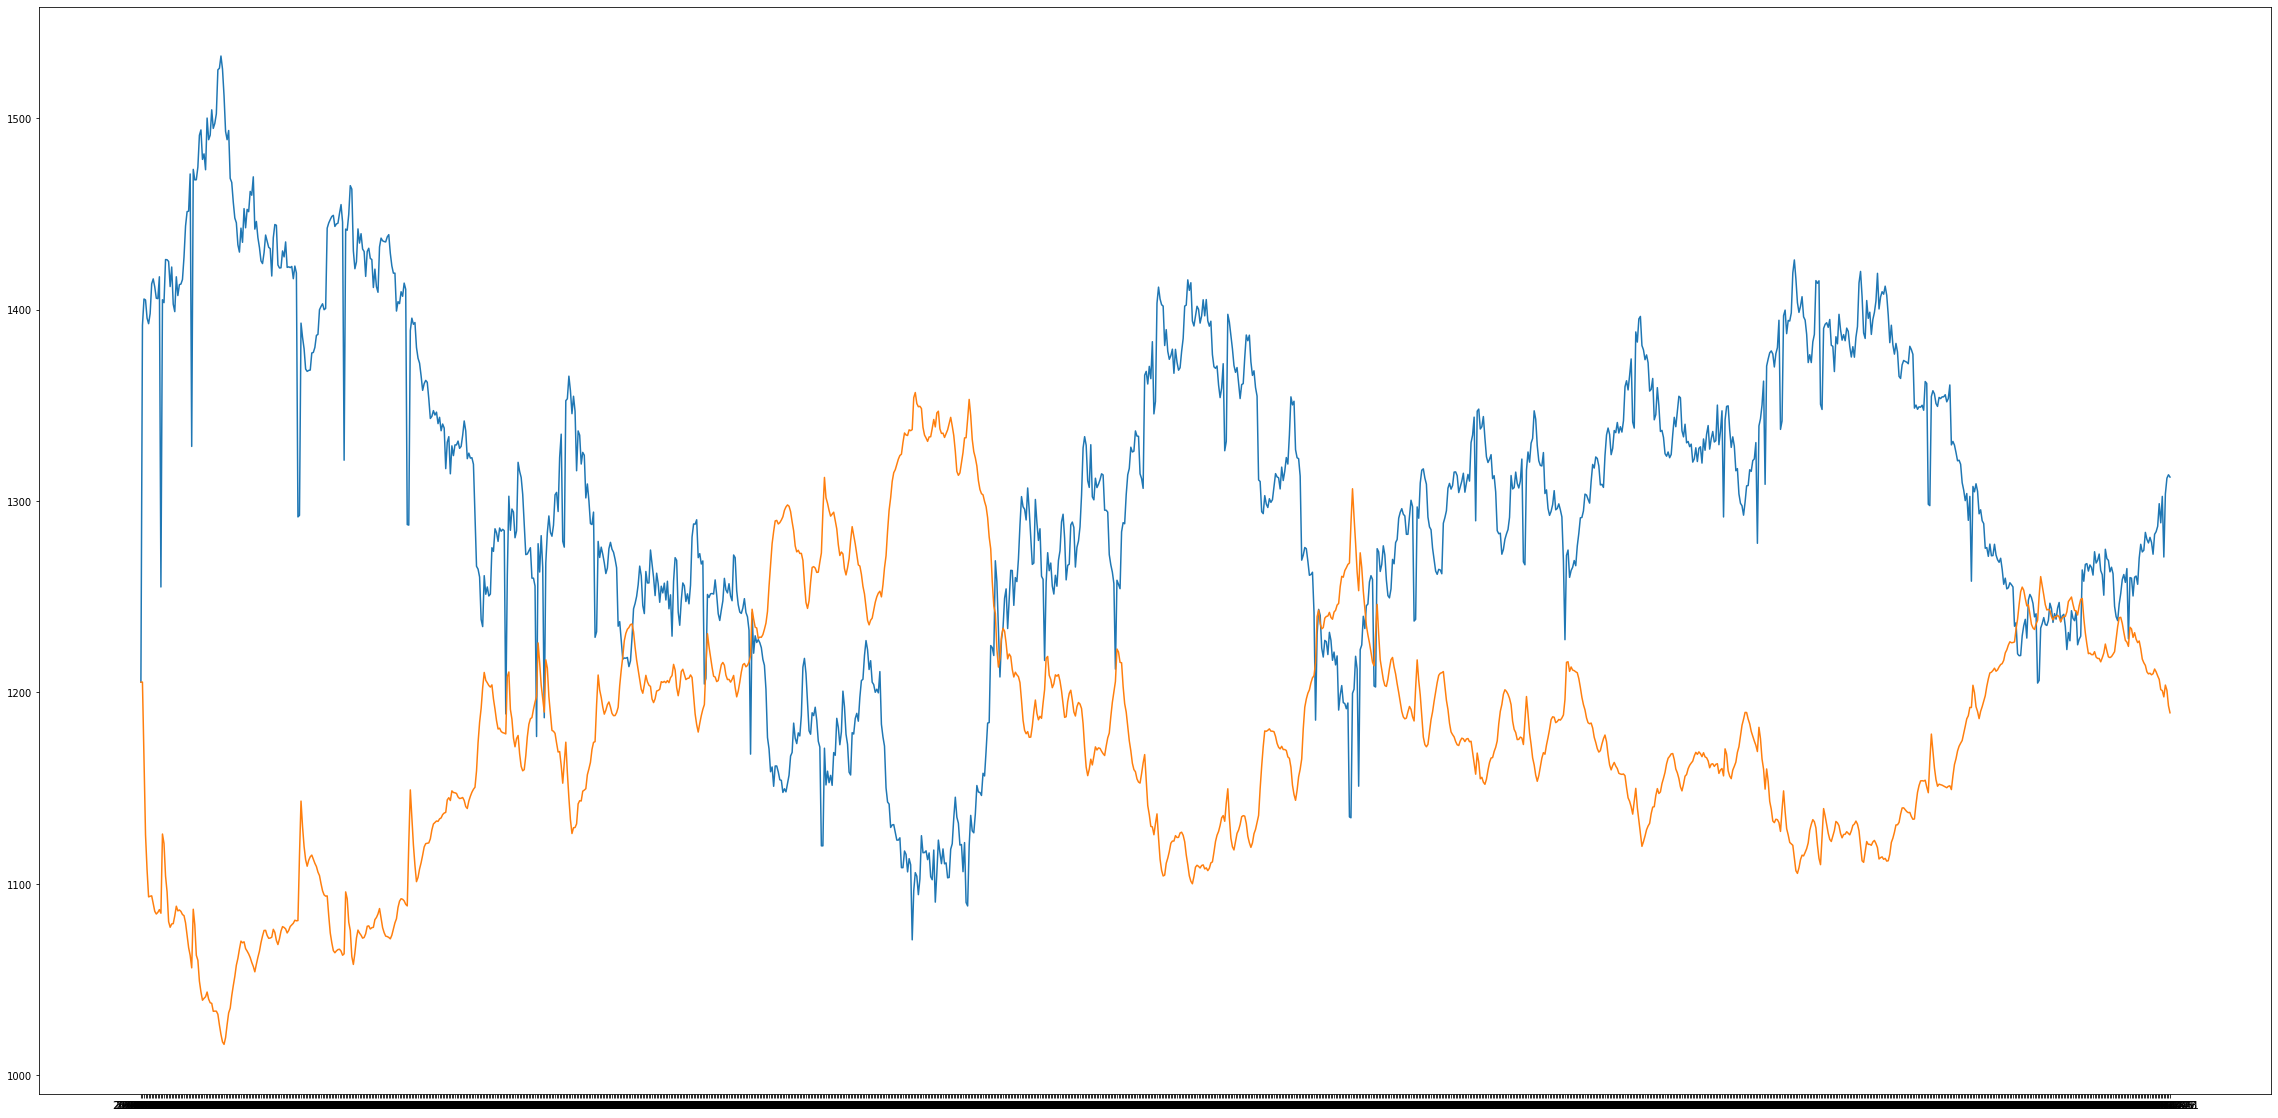

In [152]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(IndexedDataset)
plt.plot(predictions_ARIMA)

In [153]:
IndexedDataset_logScale

,Terakhir
Tanggal,
2014-01-01,7.094567
2014-01-02,7.238281
2014-01-03,7.248148
2014-01-06,7.247793
2014-01-07,7.241008
2014-01-08,7.238928
2014-01-09,7.242726
2014-01-10,7.253753
2014-01-13,7.255591


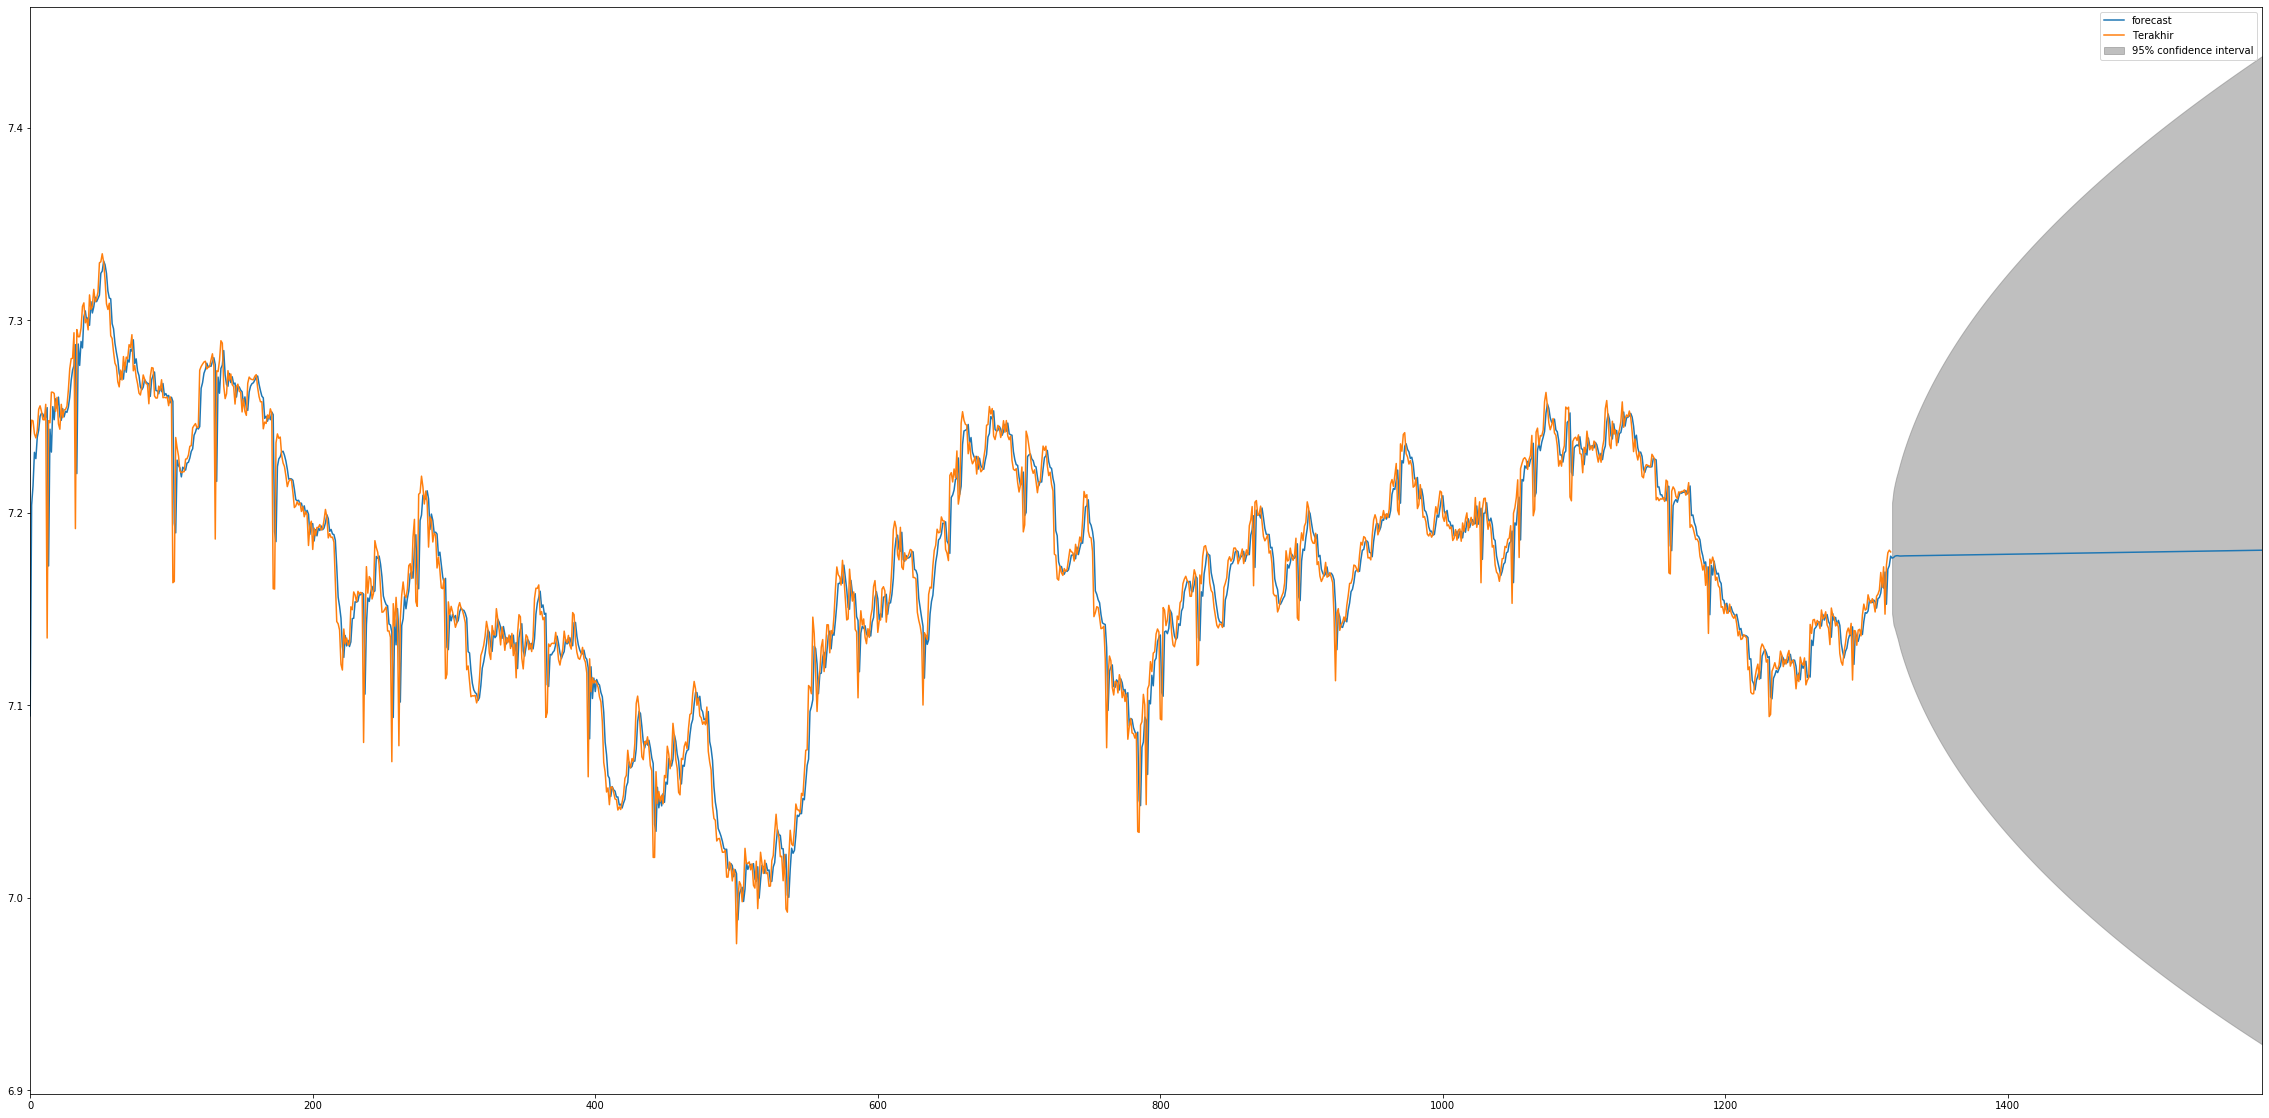

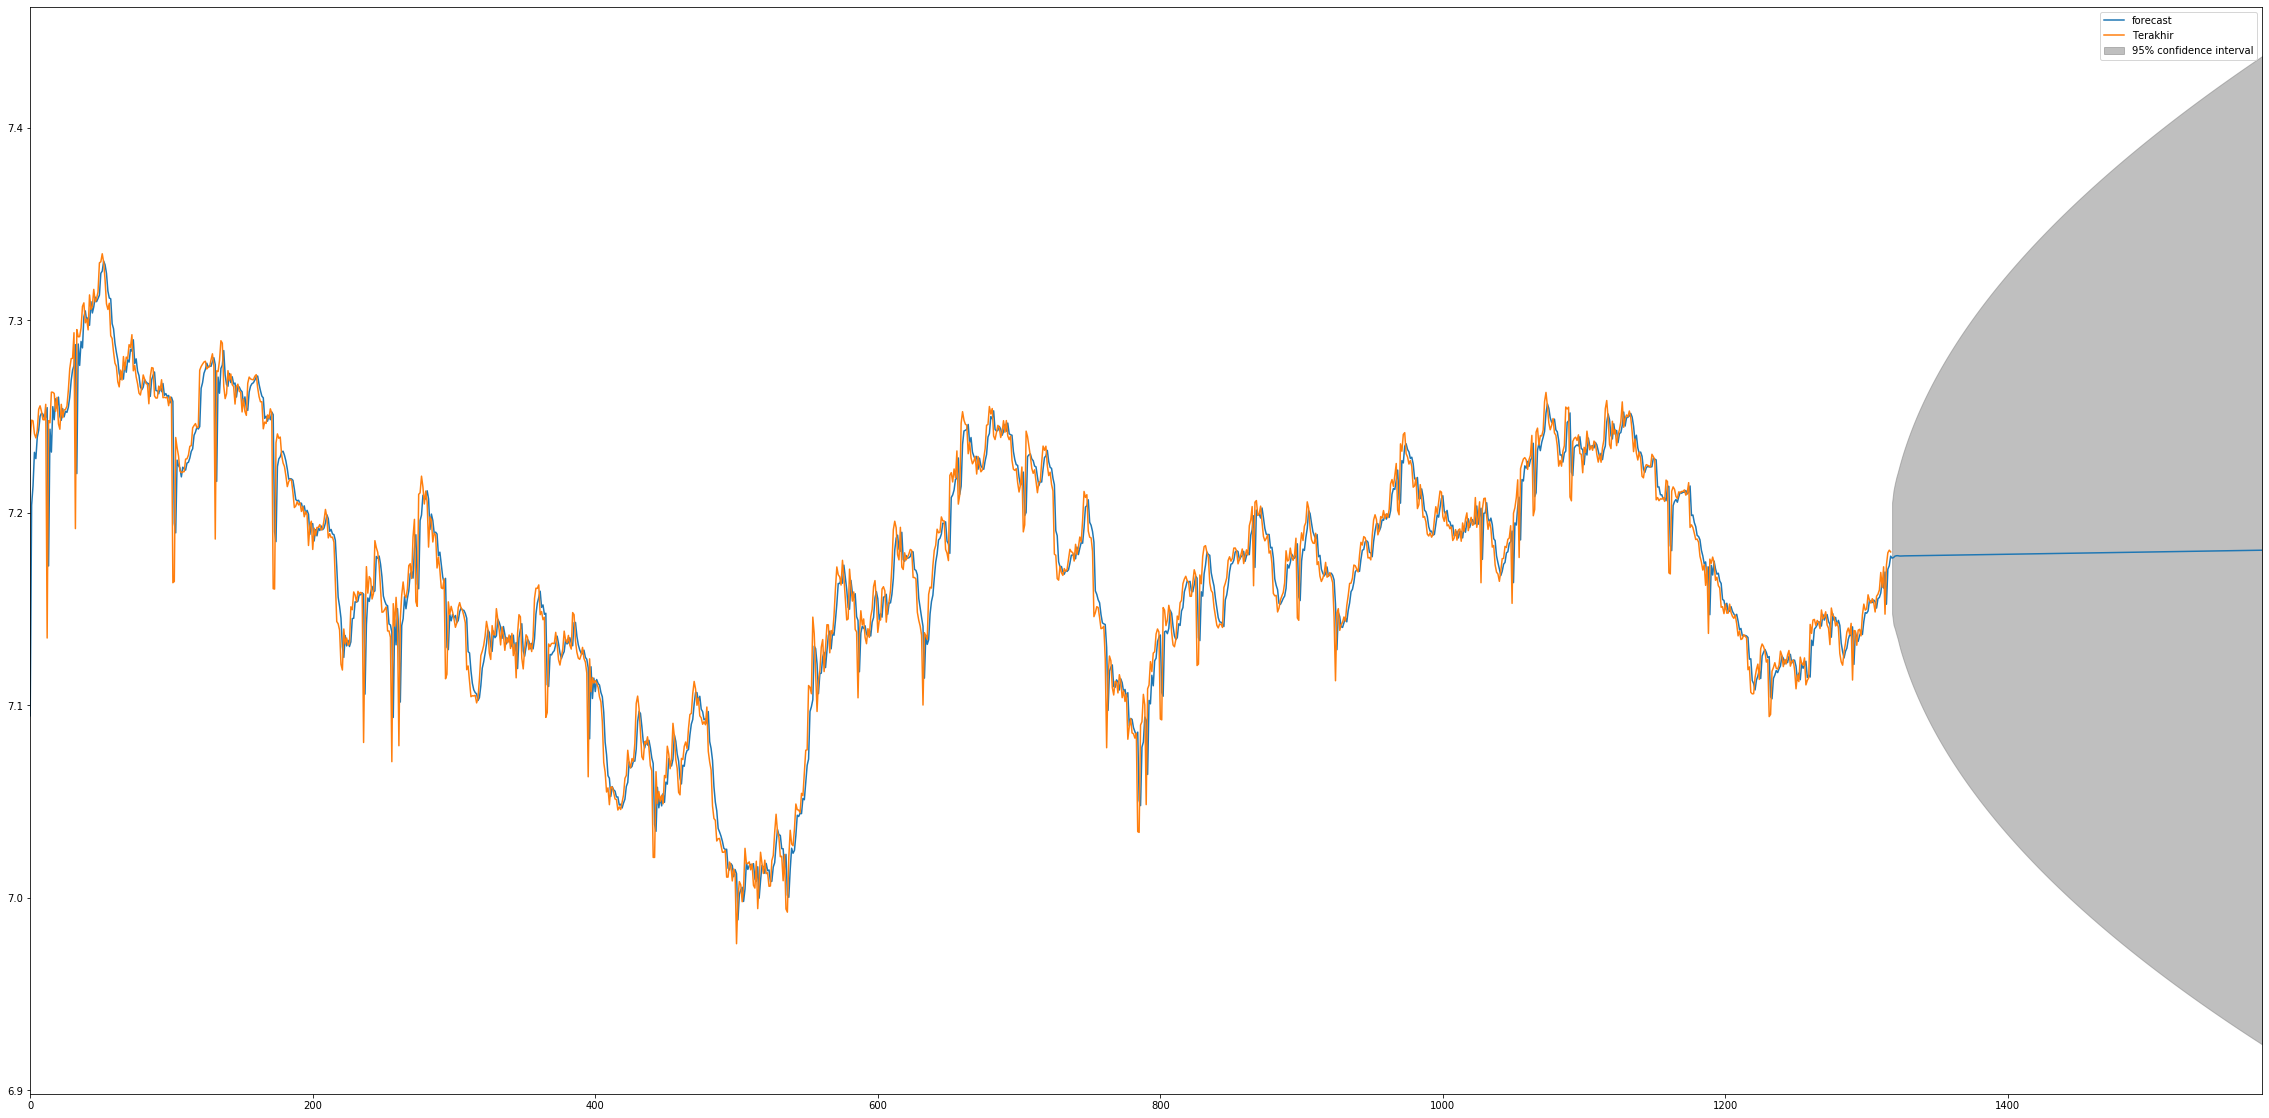

In [156]:
results_AR.plot_predict(1,1319+262)